# Analyse Exploratoire des Émissions de CO2 des Bâtiments Non Résidentiels de Seattle

**Objectif**: Identifier les facteurs explicatifs des émissions de CO2 pour les maisons non résidentielles

**Source des données**: Seattle Building Energy Benchmarking 2016 (Kaggle)

---

## Table des Matières
1. [Importation des bibliothèques et chargement des données](#1)
2. [Analyse de la variable cible : Émissions de CO2](#2)
   - 2.1 Visualisation de la répartition
   - 2.2 Analyse des valeurs manquantes
   - 2.3 Détection des valeurs aberrantes
   - 2.4 Tests de normalité
3. [Analyse des variables quantitatives](#3)
   - 3.1 Statistiques descriptives
   - 3.2 Matrices de corrélation
   - 3.3 Visualisations bivariées
4. [Analyse des variables qualitatives](#4)
   - 4.1 Distribution des catégories
   - 4.2 Relation avec les émissions de CO2
5. [Conclusions et Recommandations](#5)

<a id='1'></a>
## 1. Importation des bibliothèques et chargement des données

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, anderson, kstest
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Bibliothèques importées avec succès")

✓ Bibliothèques importées avec succès


In [2]:
# Chargement des données
url = "https://raw.githubusercontent.com/MouslyDiaw/handson-machine-learning/master/data/2016_Building_Energy_Benchmarking.csv"
df = pd.read_csv(url, low_memory=False)

print(f"Dimensions du dataset: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\n{'='*80}")
print("Aperçu des premières lignes:")
print(f"{'='*80}")
df.head()

Dimensions du dataset: 3376 lignes × 46 colonnes

Aperçu des premières lignes:


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [3]:
# Informations générales sur le dataset
print("\nInformations sur le dataset:")
print("="*80)
df.info()


Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   obj

In [5]:
#  Aperçu général
print("INFORMATIONS GENERALES DU DATASET")

df.shape

INFORMATIONS GENERALES DU DATASET


(3376, 46)

In [6]:
print("\nTYPES DE VARIABLES")
print("-"*80)
print(df.dtypes.value_counts())
print(f"\nDétail :")
print(f"  - Variables numériques : {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"  - Variables textuelles : {df.select_dtypes(include=['object']).shape[1]}")
print(f"  - Variables booléennes : {df.select_dtypes(include=['bool']).shape[1]}")


TYPES DE VARIABLES
--------------------------------------------------------------------------------
float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

Détail :
  - Variables numériques : 30
  - Variables textuelles : 15
  - Variables booléennes : 1


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OSEBuildingID,3376.0,NaN,NaN,NaN,21208.991114,12223.757015,1.0,19990.75,23112.0,25994.25,50226.0
DataYear,3376.0,NaN,NaN,NaN,2016.0,0.0,2016.0,2016.0,2016.0,2016.0,2016.0
BuildingType,3376,8,NonResidential,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimaryPropertyType,3376,24,Low-Rise Multifamily,987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertyName,3376,3362,Northgate Plaza,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,3376,3354,2600 SW Barton St,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3376,1,Seattle,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,3376,1,WA,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,3360.0,NaN,NaN,NaN,98116.949107,18.615205,98006.0,98105.0,98115.0,98122.0,98272.0
TaxParcelIdentificationNumber,3376,3268,1625049001,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse initial de la variable d'interet

In [10]:
# Comptage initial
print("\n Distribution des types d'habitations ")
print(df['BuildingType'].value_counts())


 Distribution des types d'habitations 
BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64


In [11]:
# Types résidentiels à exclure
residential_types = [
    "Multifamily MR (5-9)",
    "Multifamily HR (10+)",
    "Multifamily LR (1-4)"
]

In [12]:
initial_count = len(df)
df = df[~df["BuildingType"].isin(residential_types)].copy()

print(f"\n Bâtiments résidentiels exclus : {initial_count - len(df)}")
print(f" Périmètre final : {len(df)} bâtiments")


 Bâtiments résidentiels exclus : 1708
 Périmètre final : 1668 bâtiments


In [ ]:
# Harmonisation de la modalité "Nonresidential WA"
df["BuildingType"] = df["BuildingType"].replace({
    "Nonresidential WA": "NonResidential"
})

print("\n Distribution BuildingType (APRÈS nettoyage)")
print(df['BuildingType'].value_counts())


📊 Distribution BuildingType (APRÈS nettoyage)
BuildingType
NonResidential        1461
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Name: count, dtype: int64


## 2. Analyse exploratoire & Feature Engineering

### analyse de la variable cible

In [15]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [18]:
variable_cible = 'TotalGHGEmissions'

cible = df[variable_cible].dropna()

# STATISTIQUES DESCRIPTIVES
print(f"\n STATISTIQUES DESCRIPTIVES")
print("-"*80)
print(f"Observations valides sans valeurs manquantes  : {len(cible)} / {len(df)} ({len(cible)/len(df)*100:.1f}%)")
print(f"Valeurs manquantes    : {df[variable_cible].isna().sum()}")
print(f"Moyenne               : {cible.mean():.2f}")
print(f"Médiane               : {cible.median():.2f}")
print(f"Écart-type            : {cible.std():.2f}")
print(f"Min                   : {cible.min():.2f}")
print(f"Max                   : {cible.max():.2f}")
print(f"Q1 (25%)              : {cible.quantile(0.25):.2f}")
print(f"Q3 (75%)              : {cible.quantile(0.75):.2f}")


 STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------
Observations valides sans valeurs manquantes  : 1666 / 1668 (99.9%)
Valeurs manquantes    : 2
Moyenne               : 184.97
Médiane               : 49.58
Écart-type            : 751.98
Min                   : -0.80
Max                   : 16870.98
Q1 (25%)              : 19.97
Q3 (75%)              : 142.38


<a id='2'></a>
## 2. Analyse de la Variable Cible : Émissions de CO2

### 2.1 Visualisation de la Répartition des Modalités

In [ ]:
# Statistiques descriptives de la variable cible
print("STATISTIQUES DESCRIPTIVES - ÉMISSIONS DE CO2")
print("="*80)
print(df[target_col].describe())
print(f"\nMédiane: {df[target_col].median():.2f}")
print(f"Mode: {df[target_col].mode().values[0] if len(df[target_col].mode()) > 0 else 'N/A'}")
print(f"Coefficient de variation: {(df[target_col].std() / df[target_col].mean() * 100):.2f}%")
print(f"Asymétrie (Skewness): {df[target_col].skew():.2f}")
print(f"Aplatissement (Kurtosis): {df[target_col].kurtosis():.2f}")

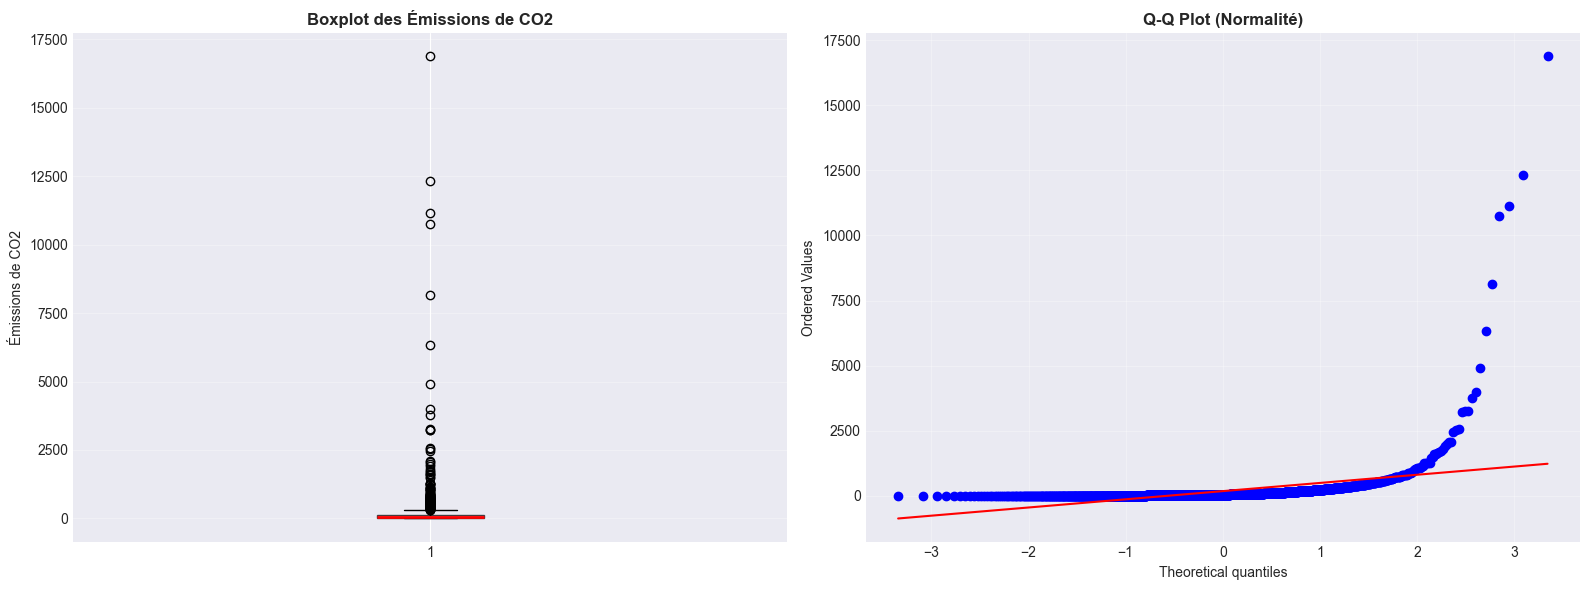


✓ Graphiques de distribution générés


In [27]:
# Visualisation de la distribution

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
axes[0].boxplot(
    df[variable_cible].dropna(),
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral', alpha=0.7),
    medianprops=dict(color='red', linewidth=2)
)
axes[0].set_ylabel('Émissions de CO2')
axes[0].set_title('Boxplot des Émissions de CO2', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Q-Q plot
stats.probplot(df[variable_cible].dropna(), dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normalité)', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Graphiques de distribution générés")

### 2.2 Analyse des Valeurs Manquantes

In [31]:
# Analyse complète des valeurs manquantes
missing_data = pd.DataFrame({
    'Colonnes': df.columns,
    'Nb_Manquantes': df.isnull().sum().values,
    'Pourcentage': (df.isnull().sum().values / len(df) * 100).round(2)
}).sort_values('Nb_Manquantes', ascending=False)

print("ANALYSE DES VALEURS MANQUANTES")
print("="*80) 
print(missing_data[missing_data['Nb_Manquantes'] > 0].head(20))
print(f"\nVariable cible ({variable_cible}):")
print(f"  - Valeurs manquantes: {df[variable_cible].isnull().sum()} ({(df[variable_cible].isnull().sum()/len(df)*100):.2f}%)")
print(f"  - Valeurs présentes: {df[variable_cible].notna().sum()} ({(df[variable_cible].notna().sum()/len(df)*100):.2f}%)")

ANALYSE DES VALEURS MANQUANTES
                           Colonnes  Nb_Manquantes  Pourcentage
41                         Comments           1668       100.00
43                          Outlier           1651        98.98
27         YearsENERGYSTARCertified           1570        94.12
25      ThirdLargestPropertyUseType           1315        78.84
26   ThirdLargestPropertyUseTypeGFA           1315        78.84
23     SecondLargestPropertyUseType            813        48.74
24  SecondLargestPropertyUseTypeGFA            813        48.74
28                  ENERGYSTARScore            574        34.41
8                           ZipCode             16         0.96
21           LargestPropertyUseType              6         0.36
22        LargestPropertyUseTypeGFA              6         0.36
29                 SiteEUI(kBtu/sf)              3         0.18
30               SiteEUIWN(kBtu/sf)              3         0.18
34            SiteEnergyUseWN(kBtu)              3         0.18
37       

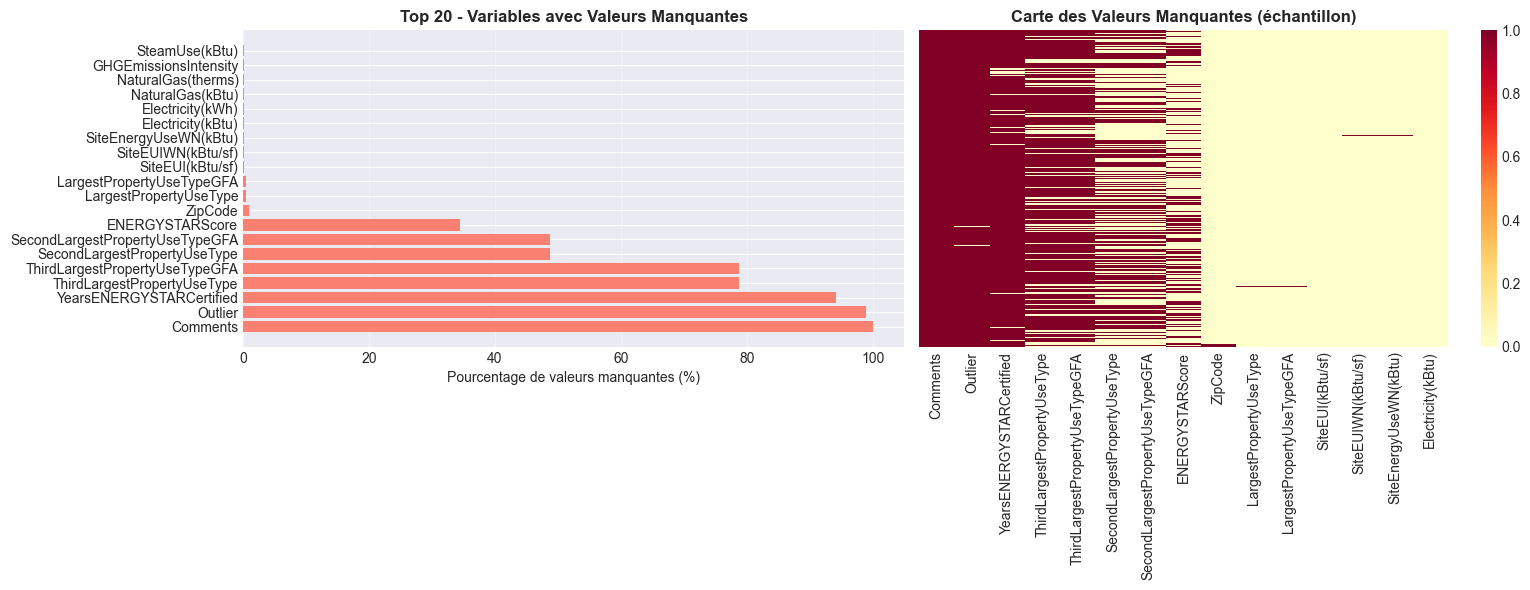


✓ Visualisations des valeurs manquantes générées


In [32]:
# Visualisation des valeurs manquantes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique en barres des top 20 colonnes avec valeurs manquantes
top_missing = missing_data[missing_data['Nb_Manquantes'] > 0].head(20)
axes[0].barh(top_missing['Colonnes'], top_missing['Pourcentage'], color='salmon')
axes[0].set_xlabel('Pourcentage de valeurs manquantes (%)')
axes[0].set_title('Top 20 - Variables avec Valeurs Manquantes', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')

# Heatmap des valeurs manquantes (échantillon de colonnes)
sample_cols = missing_data[missing_data['Nb_Manquantes'] > 0]['Colonnes'].head(15).tolist()
if sample_cols:
    sns.heatmap(df[sample_cols].isnull(), cbar=True, yticklabels=False, 
                cmap='YlOrRd', ax=axes[1])
    axes[1].set_title('Carte des Valeurs Manquantes (échantillon)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n✓ Visualisations des valeurs manquantes générées")

### 2.3 Détection des Valeurs Aberrantes

In [33]:
# Méthode 1: Règle de l'IQR (Interquartile Range)
Q1 = df[variable_cible].quantile(0.25)
Q3 = df[variable_cible].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df[variable_cible] < lower_bound) | (df[variable_cible] > upper_bound)][variable_cible]

print("DÉTECTION DES VALEURS ABERRANTES")
print("="*80)
print("\n1. Méthode IQR (Interquartile Range):")
print(f"   Q1 (25e percentile): {Q1:.2f}")
print(f"   Q3 (75e percentile): {Q3:.2f}")
print(f"   IQR: {IQR:.2f}")
print(f"   Limite inférieure: {lower_bound:.2f}")
print(f"   Limite supérieure: {upper_bound:.2f}")
print(f"   Nombre de valeurs aberrantes: {len(outliers_iqr)} ({len(outliers_iqr)/len(df)*100:.2f}%)")

# Méthode 2: Z-score
z_scores = np.abs(stats.zscore(df[variable_cible].dropna()))
outliers_zscore = df[variable_cible].dropna()[z_scores > 3]

print("\n2. Méthode Z-score (|Z| > 3):")
print(f"   Nombre de valeurs aberrantes: {len(outliers_zscore)} ({len(outliers_zscore)/len(df)*100:.2f}%)")

DÉTECTION DES VALEURS ABERRANTES

1. Méthode IQR (Interquartile Range):
   Q1 (25e percentile): 19.97
   Q3 (75e percentile): 142.38
   IQR: 122.41
   Limite inférieure: -163.66
   Limite supérieure: 326.00
   Nombre de valeurs aberrantes: 178 (10.67%)

2. Méthode Z-score (|Z| > 3):
   Nombre de valeurs aberrantes: 15 (0.90%)


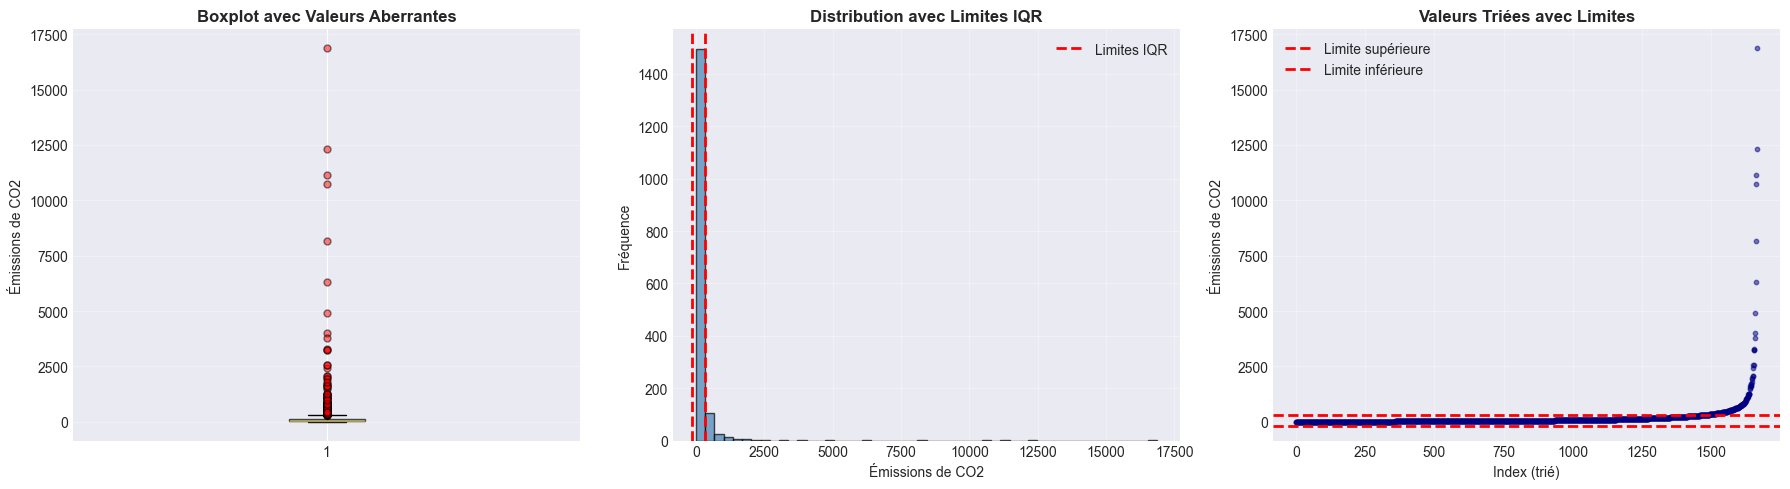


✓ Visualisations des valeurs aberrantes générées


In [ ]:
# Visualisation des outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot avec outliers mis en évidence
bp = axes[0].boxplot(df[variable_cible].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
axes[0].set_ylabel('Émissions de CO2')
axes[0].set_title('Boxplot avec Valeurs Aberrantes', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Histogramme avec limites IQR
axes[1].hist(df[variable_cible].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[1].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label='Limites IQR')
axes[1].axvline(upper_bound, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Émissions de CO2')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution avec Limites IQR', fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Scatter plot de l'index vs valeurs
axes[2].scatter(range(len(df[variable_cible].dropna())), sorted(df[variable_cible].dropna()), 
                alpha=0.5, s=10, color='navy')
axes[2].axhline(upper_bound, color='red', linestyle='--', linewidth=2, label='Limite supérieure')
axes[2].axhline(lower_bound, color='red', linestyle='--', linewidth=2, label='Limite inférieure')
axes[2].set_xlabel('Index (trié)')
axes[2].set_ylabel('Émissions de CO2')
axes[2].set_title('Valeurs Triées avec Limites', fontweight='bold', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualisations des valeurs aberrantes générées")

### 2.4 Tests de Normalité

In [35]:
# Préparation des données (retrait des NaN)
data_clean = df[variable_cible].dropna()

print("TESTS DE NORMALITÉ")
print("="*80)
print("\nHypothèse nulle (H0): Les données suivent une distribution normale")
print("Seuil de significativité: α = 0.05\n")

# Test 1: Shapiro-Wilk (recommandé pour n < 5000)
if len(data_clean) < 5000:
    stat_shapiro, p_shapiro = shapiro(data_clean)
    print("1. Test de Shapiro-Wilk:")
    print(f"   Statistique: {stat_shapiro:.6f}")
    print(f"   P-value: {p_shapiro:.6e}")
    print(f"   Conclusion: {'Rejeter H0 - Distribution NON normale' if p_shapiro < 0.05 else 'Ne pas rejeter H0 - Distribution normale'}")
else:
    print("1. Test de Shapiro-Wilk: Non applicable (n > 5000)")

# Test 2: D'Agostino-Pearson
stat_dagostino, p_dagostino = normaltest(data_clean)
print("\n2. Test de D'Agostino-Pearson:")
print(f"   Statistique: {stat_dagostino:.6f}")
print(f"   P-value: {p_dagostino:.6e}")
print(f"   Conclusion: {'Rejeter H0 - Distribution NON normale' if p_dagostino < 0.05 else 'Ne pas rejeter H0 - Distribution normale'}")

# Test 3: Anderson-Darling
result_anderson = anderson(data_clean)
print("\n3. Test d'Anderson-Darling:")
print(f"   Statistique: {result_anderson.statistic:.6f}")
print("   Valeurs critiques:")
for i, (sl, cv) in enumerate(zip(result_anderson.significance_level, result_anderson.critical_values)):
    print(f"     - {sl}%: {cv:.3f} {'(Rejeter H0)' if result_anderson.statistic > cv else '(Ne pas rejeter H0)'}")

# Test 4: Kolmogorov-Smirnov
stat_ks, p_ks = kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
print("\n4. Test de Kolmogorov-Smirnov:")
print(f"   Statistique: {stat_ks:.6f}")
print(f"   P-value: {p_ks:.6e}")
print(f"   Conclusion: {'Rejeter H0 - Distribution NON normale' if p_ks < 0.05 else 'Ne pas rejeter H0 - Distribution normale'}")

TESTS DE NORMALITÉ

Hypothèse nulle (H0): Les données suivent une distribution normale
Seuil de significativité: α = 0.05

1. Test de Shapiro-Wilk:
   Statistique: 0.177037
   P-value: 6.701676e-65
   Conclusion: Rejeter H0 - Distribution NON normale

2. Test de D'Agostino-Pearson:
   Statistique: 3167.587714
   P-value: 0.000000e+00
   Conclusion: Rejeter H0 - Distribution NON normale

3. Test d'Anderson-Darling:
   Statistique: 415.320931
   Valeurs critiques:
     - 15.0%: 0.575 (Rejeter H0)
     - 10.0%: 0.654 (Rejeter H0)
     - 5.0%: 0.785 (Rejeter H0)
     - 2.5%: 0.916 (Rejeter H0)
     - 1.0%: 1.089 (Rejeter H0)

4. Test de Kolmogorov-Smirnov:
   Statistique: 0.402436
   P-value: 3.934734e-244
   Conclusion: Rejeter H0 - Distribution NON normale


In [36]:
# Résumé des tests de normalité
print("\n" + "="*80)
print("SYNTHÈSE DES TESTS DE NORMALITÉ")
print("="*80)

tests_results = {
    "Test": [],
    "P-value": [],
    "Normalité (α=0.05)": []
}

if len(data_clean) < 5000:
    tests_results["Test"].append("Shapiro-Wilk")
    tests_results["P-value"].append(f"{p_shapiro:.6e}")
    tests_results["Normalité (α=0.05)"].append("Non" if p_shapiro < 0.05 else "Oui")

tests_results["Test"].append("D'Agostino-Pearson")
tests_results["P-value"].append(f"{p_dagostino:.6e}")
tests_results["Normalité (α=0.05)"].append("Non" if p_dagostino < 0.05 else "Oui")

tests_results["Test"].append("Kolmogorov-Smirnov")
tests_results["P-value"].append(f"{p_ks:.6e}")
tests_results["Normalité (α=0.05)"].append("Non" if p_ks < 0.05 else "Oui")

results_df = pd.DataFrame(tests_results)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("RECOMMANDATIONS POUR LA RÉGRESSION")
print("="*80)

all_non_normal = all(res == "Non" for res in tests_results["Normalité (α=0.05)"])

if all_non_normal:
    print("\n⚠ La variable cible ne suit PAS une distribution normale.")
    print("\nTransformations recommandées:")
    print("  1. Transformation logarithmique: log(y) si y > 0")
    print("  2. Transformation racine carrée: √y")
    print("  3. Transformation Box-Cox")
    print("  4. Transformation Yeo-Johnson (pour données avec valeurs négatives)")
    print("\nAlternatives:")
    print("  - Utiliser des méthodes de régression robustes aux violations de normalité")
    print("  - Modèles non-paramétriques (ex: arbres de décision, random forest)")
else:
    print("\n✓ La variable cible suit approximativement une distribution normale.")
    print("  → Régression linéaire classique possible sans transformation")


SYNTHÈSE DES TESTS DE NORMALITÉ
              Test       P-value Normalité (α=0.05)
      Shapiro-Wilk  6.701676e-65                Non
D'Agostino-Pearson  0.000000e+00                Non
Kolmogorov-Smirnov 3.934734e-244                Non

RECOMMANDATIONS POUR LA RÉGRESSION

⚠ La variable cible ne suit PAS une distribution normale.

Transformations recommandées:
  1. Transformation logarithmique: log(y) si y > 0
  2. Transformation racine carrée: √y
  3. Transformation Box-Cox
  4. Transformation Yeo-Johnson (pour données avec valeurs négatives)

Alternatives:
  - Utiliser des méthodes de régression robustes aux violations de normalité
  - Modèles non-paramétriques (ex: arbres de décision, random forest)


In [38]:
# Tests de normalité sur la variable log-transformée
log_target = np.log1p(df['TotalGHGEmissions'].dropna())

alpha = 0.05

# Test 1: Shapiro-Wilk (recommandé pour n < 5000)
if len(log_target) < 5000:
    stat_shapiro, p_shapiro = shapiro(log_target)
    print("1. Test de Shapiro-Wilk:")
    print(f"   Statistique: {stat_shapiro:.6f}")
    print(f"   P-value: {p_shapiro:.6e}")
    print(f"   Conclusion: {'Rejeter H0 - Distribution NON normale' if p_shapiro < 0.05 else 'Ne pas rejeter H0 - Distribution normale'}")
else:
    print("1. Test de Shapiro-Wilk: Non applicable (n > 5000)")

# Test 2: D'Agostino-Pearson
stat_dagostino, p_dagostino = normaltest(log_target)
print("\n2. Test de D'Agostino-Pearson:")
print(f"   Statistique: {stat_dagostino:.6f}")
print(f"   P-value: {p_dagostino:.6e}")
print(f"   Conclusion: {'Rejeter H0 - Distribution NON normale' if p_dagostino < 0.05 else 'Ne pas rejeter H0 - Distribution normale'}")

# Test 3: Anderson-Darling
result_anderson = anderson(log_target)
print("\n3. Test d'Anderson-Darling:")
print(f"   Statistique: {result_anderson.statistic:.6f}")
print("   Valeurs critiques:")
for i, (sl, cv) in enumerate(zip(result_anderson.significance_level, result_anderson.critical_values)):
    print(f"     - {sl}%: {cv:.3f} {'(Rejeter H0)' if result_anderson.statistic > cv else '(Ne pas rejeter H0)'}")

# Test 4: Kolmogorov-Smirnov
stat_ks, p_ks = kstest(log_target, 'norm', args=(log_target.mean(), log_target.std()))
print("\n4. Test de Kolmogorov-Smirnov:")
print(f"   Statistique: {stat_ks:.6f}")
print(f"   P-value: {p_ks:.6e}")
print(f"   Conclusion: {'Rejeter H0 - Distribution NON normale' if p_ks < 0.05 else 'Ne pas rejeter H0 - Distribution normale'}")

1. Test de Shapiro-Wilk:
   Statistique: 0.997162
   P-value: 4.072471e-03
   Conclusion: Rejeter H0 - Distribution NON normale

2. Test de D'Agostino-Pearson:
   Statistique: 11.665010
   P-value: 2.930727e-03
   Conclusion: Rejeter H0 - Distribution NON normale

3. Test d'Anderson-Darling:
   Statistique: 0.794412
   Valeurs critiques:
     - 15.0%: 0.575 (Rejeter H0)
     - 10.0%: 0.654 (Rejeter H0)
     - 5.0%: 0.785 (Rejeter H0)
     - 2.5%: 0.916 (Ne pas rejeter H0)
     - 1.0%: 1.089 (Ne pas rejeter H0)

4. Test de Kolmogorov-Smirnov:
   Statistique: 0.023915
   P-value: 2.918365e-01
   Conclusion: Ne pas rejeter H0 - Distribution normale


<a id='3'></a>
## 3. Analyse des Variables Quantitatives

### 3.1 Statistiques Descriptives

In [ ]:
# Variables d'identification (à exclure de la modélisation)
id_vars = ['OSEBuildingID', 'DataYear', 'PropertyName', 'Address',
           'TaxParcelIdentificationNumber', 'Comments', 'Outlier']

In [45]:
# Variables d'identification (à exclure)
id_vars = [
    'OSEBuildingID', 'DataYear', 'PropertyName', 'Address',
    'TaxParcelIdentificationNumber', 'Comments', 'Outlier'
]

# Colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Exclure les id_vars
numeric_cols = [col for col in numeric_cols if col not in id_vars]
numeric_cols = [col for col in numeric_cols if col not in ['PropertyGFATotal', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)','PropertyGFAParking', 'Latitude', 'Longitude', 'Electricity(kWh)', 'NaturalGas(therms)', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)']]

print(numeric_cols)
print(len(numeric_cols))

['ZipCode', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
14


In [46]:
# Sélection des variables numériques

print(f"VARIABLES QUANTITATIVES IDENTIFIÉES: {len(numeric_cols)}")
print("="*80)
for i, col in enumerate(numeric_cols, 1):
    print(f"{i:2d}. {col}")

# Statistiques descriptives
print("\n" + "="*80)
print("STATISTIQUES DESCRIPTIVES DES VARIABLES QUANTITATIVES")
print("="*80)
df[numeric_cols].describe().T

VARIABLES QUANTITATIVES IDENTIFIÉES: 14
 1. ZipCode
 2. CouncilDistrictCode
 3. YearBuilt
 4. NumberofBuildings
 5. NumberofFloors
 6. ENERGYSTARScore
 7. SiteEUI(kBtu/sf)
 8. SourceEUI(kBtu/sf)
 9. SiteEnergyUse(kBtu)
10. SteamUse(kBtu)
11. Electricity(kBtu)
12. NaturalGas(kBtu)
13. TotalGHGEmissions
14. GHGEmissionsIntensity

STATISTIQUES DESCRIPTIVES DES VARIABLES QUANTITATIVES


,count,mean,std,min,25%,50%,75%,max
ZipCode,1652.0,9.811682e+04,1.843035e+01,98006.00,9.810500e+04,9.810900e+04,9.812500e+04,9.819900e+04
CouncilDistrictCode,1668.0,4.356715e+00,2.191048e+00,1.00,2.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00
YearBuilt,1668.0,1.961914e+03,3.274176e+01,1900.00,1.930000e+03,1.965000e+03,1.989000e+03,2.015000e+03
NumberofBuildings,1666.0,1.168667e+00,2.931409e+00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.110000e+02
NumberofFloors,1668.0,4.121103e+00,6.563407e+00,0.00,1.000000e+00,2.000000e+00,4.000000e+00,9.900000e+01
ENERGYSTARScore,1094.0,6.544973e+01,2.849293e+01,1.00,4.800000e+01,7.300000e+01,8.900000e+01,1.000000e+02
SiteEUI(kBtu/sf),1665.0,7.215880e+01,7.404813e+01,0.00,3.370000e+01,5.190000e+01,8.170000e+01,8.344000e+02
SourceEUI(kBtu/sf),1666.0,1.758299e+02,1.859321e+02,0.00,7.645000e+01,1.309500e+02,2.039500e+02,2.620000e+03
SiteEnergyUse(kBtu),1666.0,8.437933e+06,3.024380e+07,0.00,1.229291e+06,2.554947e+06,6.913348e+06,8.739237e+08
SteamUse(kBtu),1666.0,5.125726e+05,5.513944e+06,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.349435e+08


In [47]:
# Statistiques avancées
advanced_stats = pd.DataFrame({
    'Variable': numeric_cols,
    'Médiane': df[numeric_cols].median(),
    'CV (%)': (df[numeric_cols].std() / df[numeric_cols].mean() * 100).round(2),
    'Skewness': df[numeric_cols].skew().round(2),
    'Kurtosis': df[numeric_cols].kurtosis().round(2),
    'Valeurs_Manquantes': df[numeric_cols].isnull().sum(),
    '% Manquantes': (df[numeric_cols].isnull().sum() / len(df) * 100).round(2)
})

print("\nSTATISTIQUES AVANCÉES")
print("="*80)
advanced_stats.sort_values('% Manquantes', ascending=False).head(15)


STATISTIQUES AVANCÉES


,Variable,Médiane,CV (%),Skewness,Kurtosis,Valeurs_Manquantes,% Manquantes
ENERGYSTARScore,ENERGYSTARScore,7.300000e+01,43.53,-0.78,-0.51,574,34.41
ZipCode,ZipCode,9.810900e+04,0.02,1.31,8.85,16,0.96
SiteEUI(kBtu/sf),SiteEUI(kBtu/sf),5.190000e+01,102.62,3.73,22.18,3,0.18
NumberofBuildings,NumberofBuildings,1.000000e+00,250.83,32.48,1190.98,2,0.12
SourceEUI(kBtu/sf),SourceEUI(kBtu/sf),1.309500e+02,105.75,4.93,43.66,2,0.12
SiteEnergyUse(kBtu),SiteEnergyUse(kBtu),2.554947e+06,358.43,18.05,445.12,2,0.12
Electricity(kBtu),Electricity(kBtu),1.611881e+06,355.90,20.85,599.48,2,0.12
NaturalGas(kBtu),NaturalGas(kBtu),4.982630e+05,475.47,22.10,632.25,2,0.12
TotalGHGEmissions,TotalGHGEmissions,4.958000e+01,406.53,14.21,247.10,2,0.12
SteamUse(kBtu),SteamUse(kBtu),0.000000e+00,1075.74,19.14,408.18,2,0.12


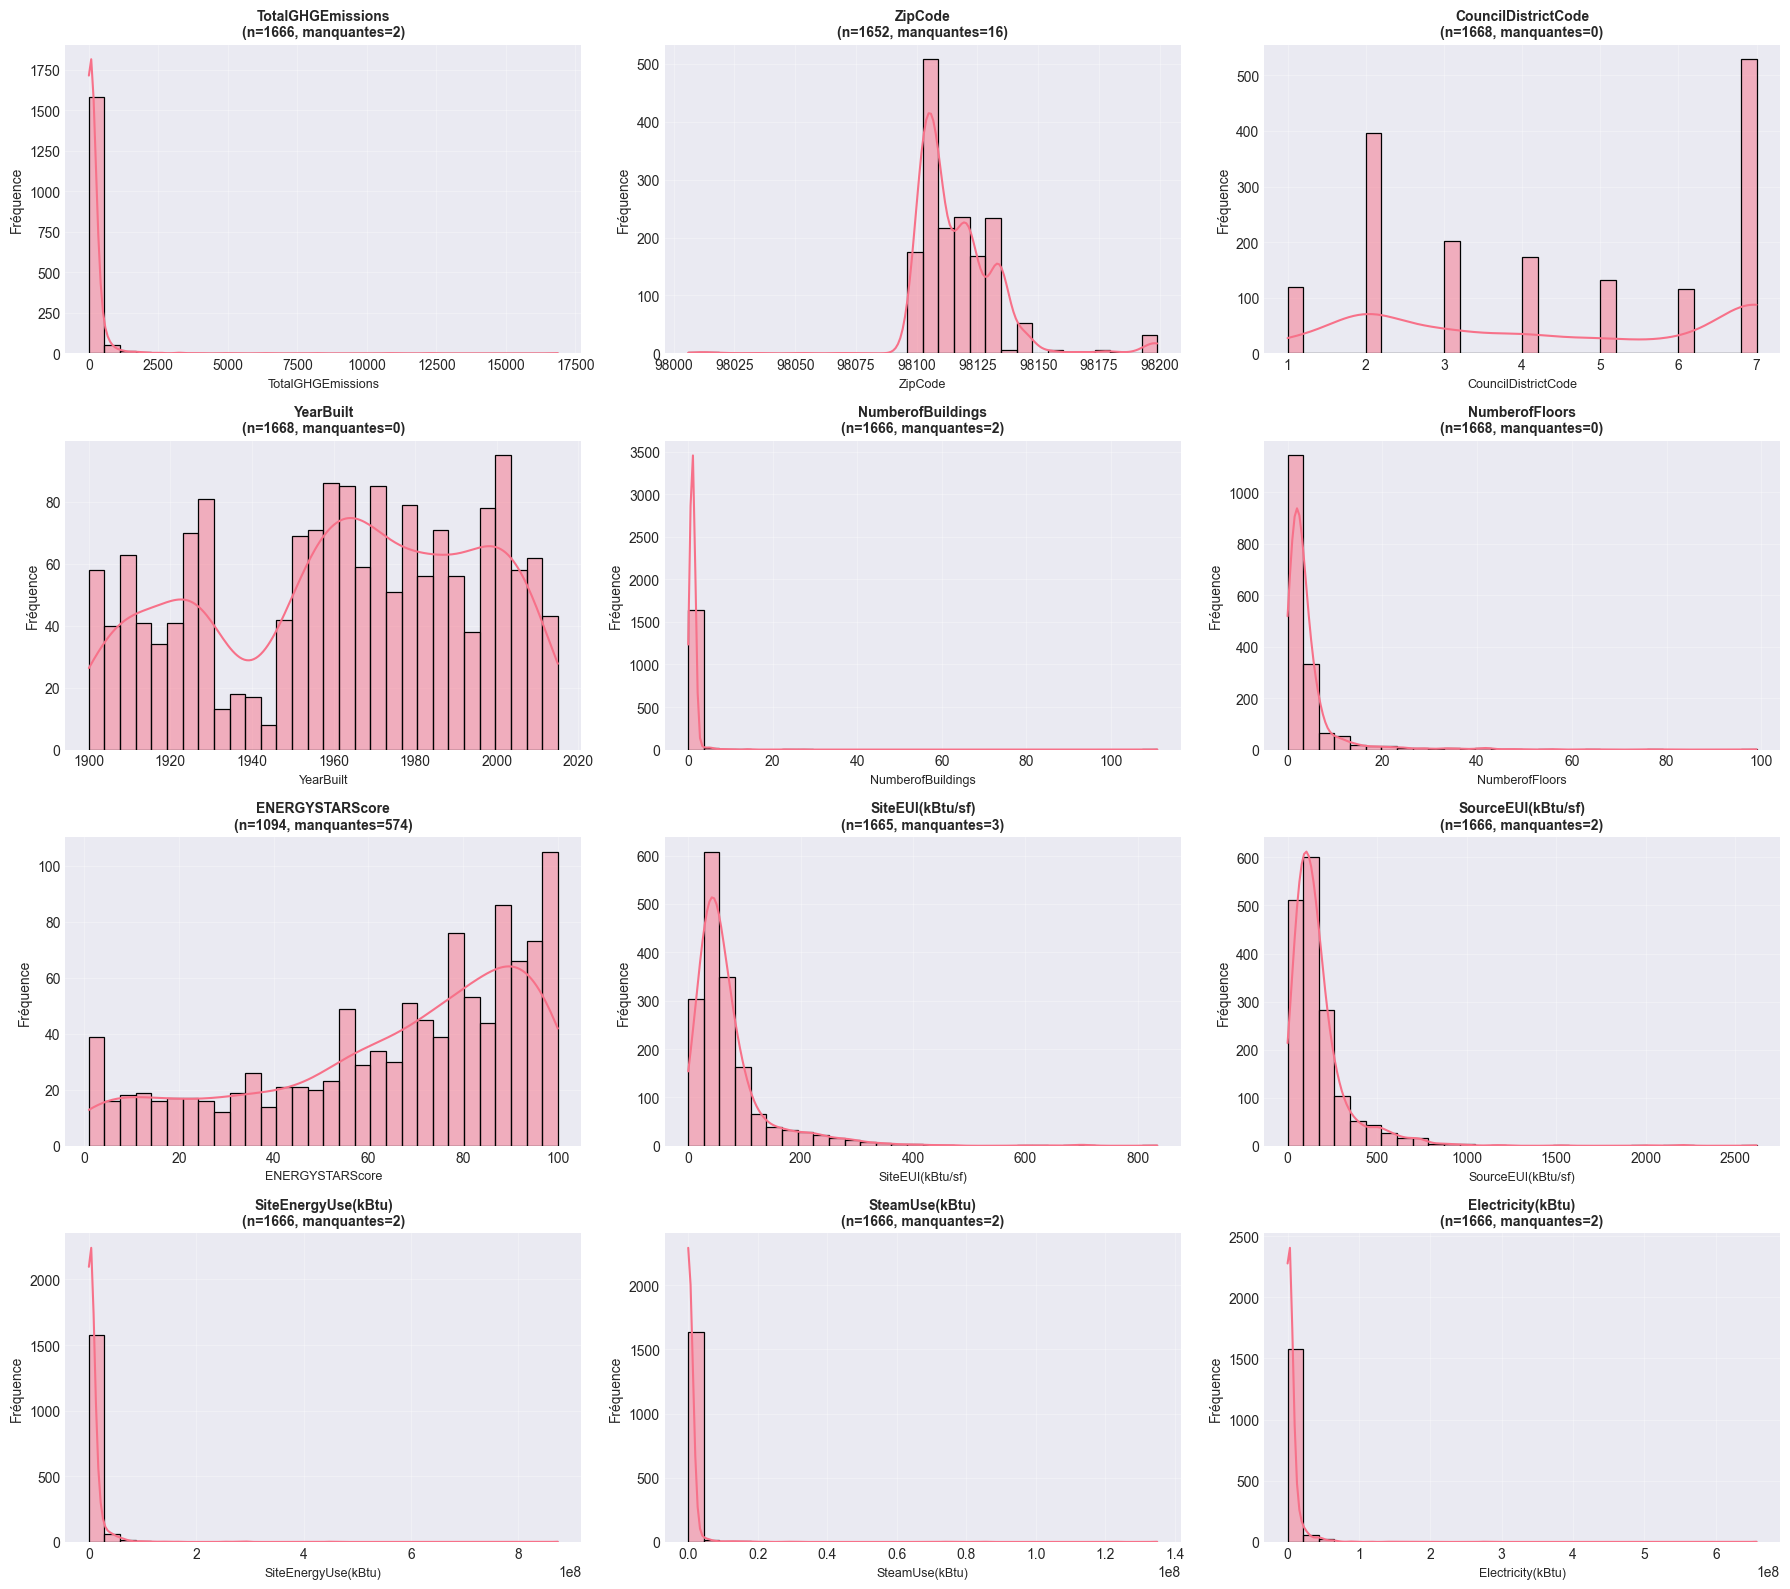


✓ Histogrammes avec courbe de densité générés


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

important_vars = advanced_stats[advanced_stats['% Manquantes'] < 50]['Variable'].head(12).tolist()

if variable_cible not in important_vars and variable_cible in numeric_cols:
    important_vars = [variable_cible] + [v for v in important_vars if v != variable_cible][:11]

n_vars = len(important_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, var in enumerate(important_vars):
    data_to_plot = df[var].dropna()

    sns.histplot(
        data_to_plot,
        bins=30,
        kde=True,            # 👈 courbe de tendance (densité)
        stat='count',
        ax=axes[idx]
    )

    axes[idx].set_xlabel(var, fontsize=9)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].set_title(
        f'{var}\n(n={len(data_to_plot)}, manquantes={df[var].isnull().sum()})',
        fontweight='bold',
        fontsize=10
    )
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes non utilisés
for idx in range(n_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n✓ Histogrammes avec courbe de densité générés")


In [94]:
# Sélectionner uniquement les variables avec plus de 13 valeurs uniques
# Cela permet d'exclure les variables quasi-catégorielles ou binaires
continuous_vars = [col for col in numeric_cols if df[col].nunique() > 13]

print("SÉLECTION DES VARIABLES CONTINUES (>13 modalités)")
print("="*80)
print(f"Nombre de variables continues identifiées: {len(continuous_vars)}\n")

# Afficher les variables sélectionnées avec leur nombre de valeurs uniques
var_info = pd.DataFrame({
    'Variable': continuous_vars,
    'Valeurs_Uniques': [df[col].nunique() for col in continuous_vars],
    'Type': [df[col].dtype for col in continuous_vars]
}).sort_values('Valeurs_Uniques', ascending=False)

print(var_info.to_string(index=False))

SÉLECTION DES VARIABLES CONTINUES (>13 modalités)
Nombre de variables continues identifiées: 13

             Variable  Valeurs_Uniques    Type
    Electricity(kBtu)             1655 float64
  SiteEnergyUse(kBtu)             1651 float64
    TotalGHGEmissions             1594 float64
   SourceEUI(kBtu/sf)             1268 float64
     NaturalGas(kBtu)             1189 float64
     SiteEUI(kBtu/sf)              961 float64
GHGEmissionsIntensity              462 float64
       SteamUse(kBtu)              115 float64
            YearBuilt              113   int64
      ENERGYSTARScore              100 float64
              ZipCode               48 float64
       NumberofFloors               45   int64
    NumberofBuildings               16 float64


In [95]:
# Limiter le nombre de variables pour le pairplot (pour éviter des graphiques trop lourds)
# On prend les variables les plus corrélées avec la cible + la cible elle-même
if variable_cible in continuous_vars:
    # Calculer les corrélations avec la variable cible
    correlations_with_target = df[continuous_vars].corr()[variable_cible].abs().sort_values(ascending=False)
    
    # Sélectionner les top variables (incluant la cible)
    max_vars_for_pairplot = 8  # Limite pour garder le graphique lisible
    top_vars_for_pairplot = correlations_with_target.head(max_vars_for_pairplot).index.tolist()
    
    print(f"\nVariables sélectionnées pour le pairplot (top {max_vars_for_pairplot}):")
    print("="*80)
    for i, var in enumerate(top_vars_for_pairplot, 1):
        corr_val = correlations_with_target[var]
        print(f"{i}. {var:40s} | Corrélation avec {variable_cible}: {corr_val:.4f}")
else:
    # Si la variable cible n'est pas dans les variables continues
    max_vars_for_pairplot = 7
    top_vars_for_pairplot = continuous_vars[:max_vars_for_pairplot]


Variables sélectionnées pour le pairplot (top 8):
1. TotalGHGEmissions                        | Corrélation avec TotalGHGEmissions: 1.0000
2. SiteEnergyUse(kBtu)                      | Corrélation avec TotalGHGEmissions: 0.8599
3. NaturalGas(kBtu)                         | Corrélation avec TotalGHGEmissions: 0.7260
4. Electricity(kBtu)                        | Corrélation avec TotalGHGEmissions: 0.6866
5. SteamUse(kBtu)                           | Corrélation avec TotalGHGEmissions: 0.6840
6. GHGEmissionsIntensity                    | Corrélation avec TotalGHGEmissions: 0.4672
7. NumberofBuildings                        | Corrélation avec TotalGHGEmissions: 0.4185
8. SiteEUI(kBtu/sf)                         | Corrélation avec TotalGHGEmissions: 0.2574



GÉNÉRATION DU PAIRPLOT
Cette visualisation peut prendre quelques instants...

Nombre d'observations utilisées: 1665
Nombre de variables: 8
Nombre total de sous-graphiques: 64



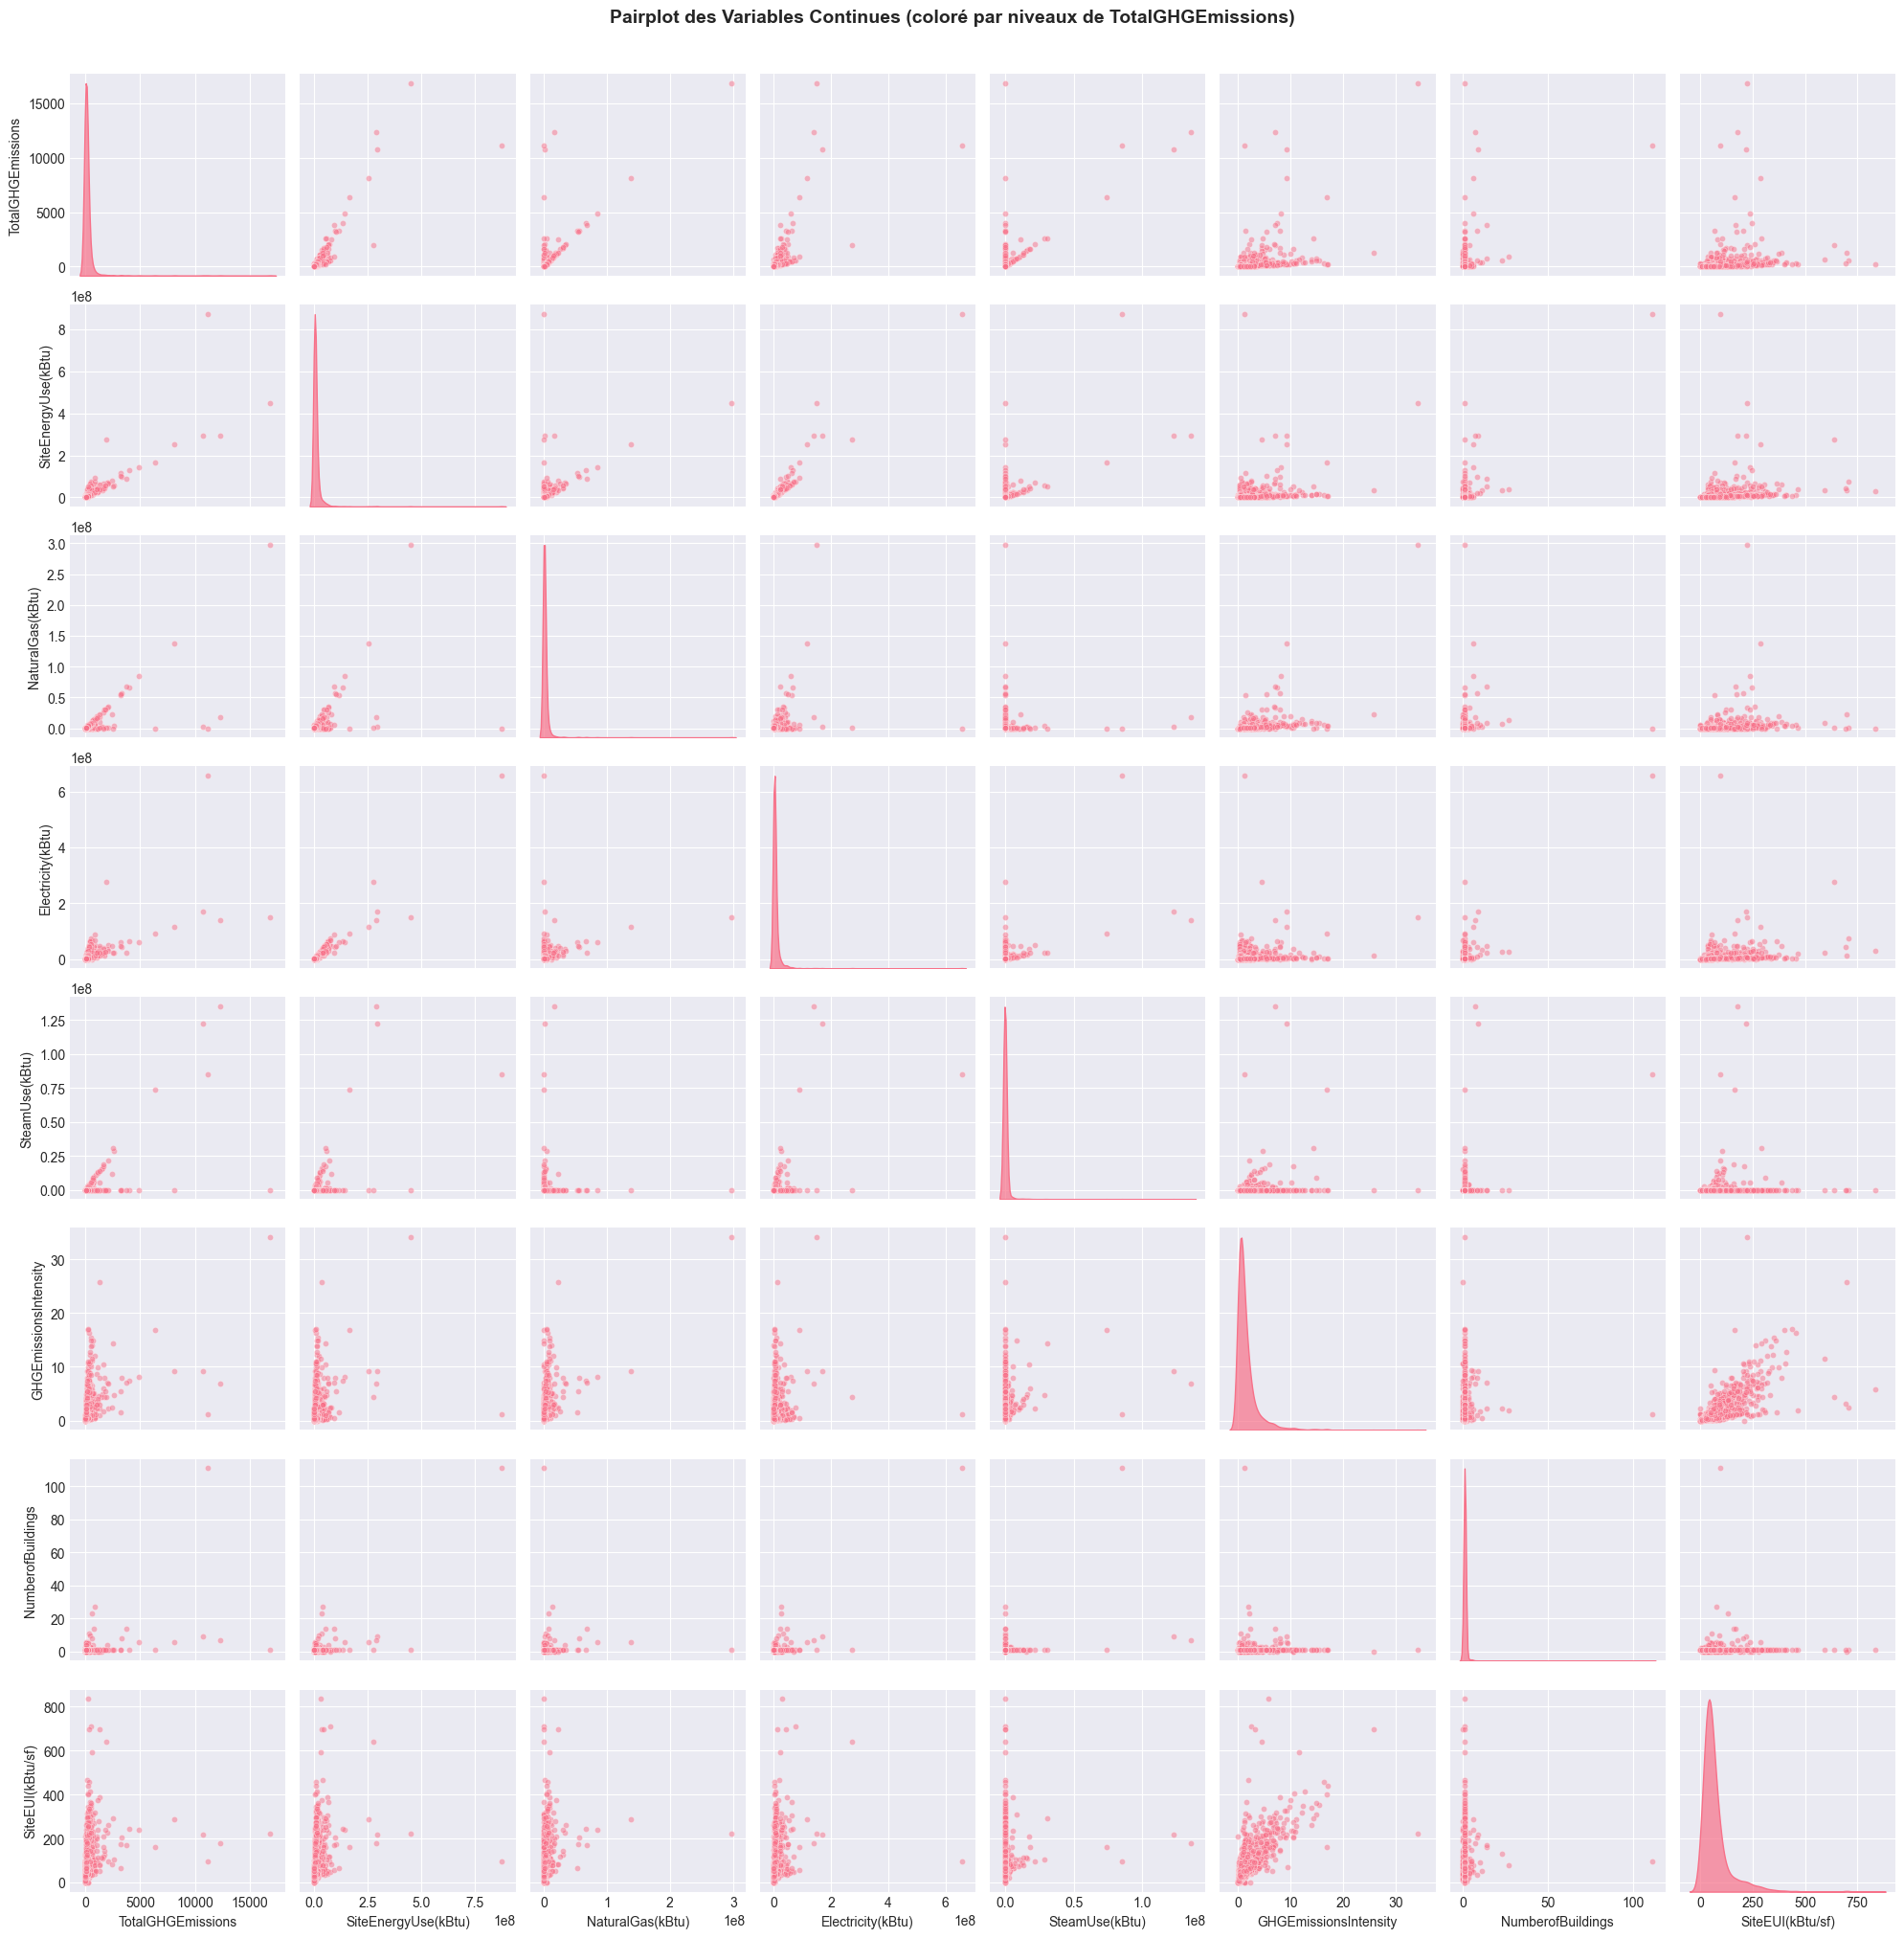


✓ Pairplot généré avec succès

Interprétation:
- Diagonale: Distribution de chaque variable (densité)
- Hors diagonale: Relations bivariées entre les variables
- Couleurs: Niveaux d'émissions de CO2 (Rouge=Élevé, Vert=Faible)


In [96]:
# Créer le pairplot
print("\n" + "="*80)
print("GÉNÉRATION DU PAIRPLOT")
print("="*80)
print("Cette visualisation peut prendre quelques instants...\n")

# Créer une copie des données pour le pairplot (sans NaN)
df_pairplot = df[top_vars_for_pairplot].dropna()

print(f"Nombre d'observations utilisées: {len(df_pairplot)}")
print(f"Nombre de variables: {len(top_vars_for_pairplot)}")
print(f"Nombre total de sous-graphiques: {len(top_vars_for_pairplot)**2}\n")

# Si on a la variable cible, on peut colorer par quantiles pour voir les patterns
if variable_cible in top_vars_for_pairplot:
    # Créer des catégories de CO2 pour la couleur (quartiles)
    #df_pairplot['CO2_Categorie'] = pd.qcut(df_pairplot[variable_cible], 
     #                                       q=4, 
      #                                      labels=['Faible', 'Moyen-Faible', 'Moyen-Élevé', 'Élevé'])
    
    # Créer le pairplot avec coloration par catégorie de CO2
    pairplot = sns.pairplot(df_pairplot, 
                           ##hue='CO2_Categorie',
                           diag_kind='kde',
                           plot_kws={'alpha': 0.5, 's': 20},
                           diag_kws={'alpha': 0.7},
                           palette='RdYlGn_r')  # Rouge pour élevé, vert pour faible
    
    pairplot.fig.suptitle(f'Pairplot des Variables Continues (coloré par niveaux de {variable_cible})', 
                         y=1.01, fontsize=14, fontweight='bold')
else:
    # Pairplot sans coloration
    pairplot = sns.pairplot(df_pairplot, 
                           diag_kind='kde',
                           plot_kws={'alpha': 0.5, 's': 20})
    
    pairplot.fig.suptitle('Pairplot des Variables Continues', 
                         y=1.01, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Pairplot généré avec succès")
print("\nInterprétation:")
print("- Diagonale: Distribution de chaque variable (densité)")
print("- Hors diagonale: Relations bivariées entre les variables")
if variable_cible in top_vars_for_pairplot:
    print("- Couleurs: Niveaux d'émissions de CO2 (Rouge=Élevé, Vert=Faible)")

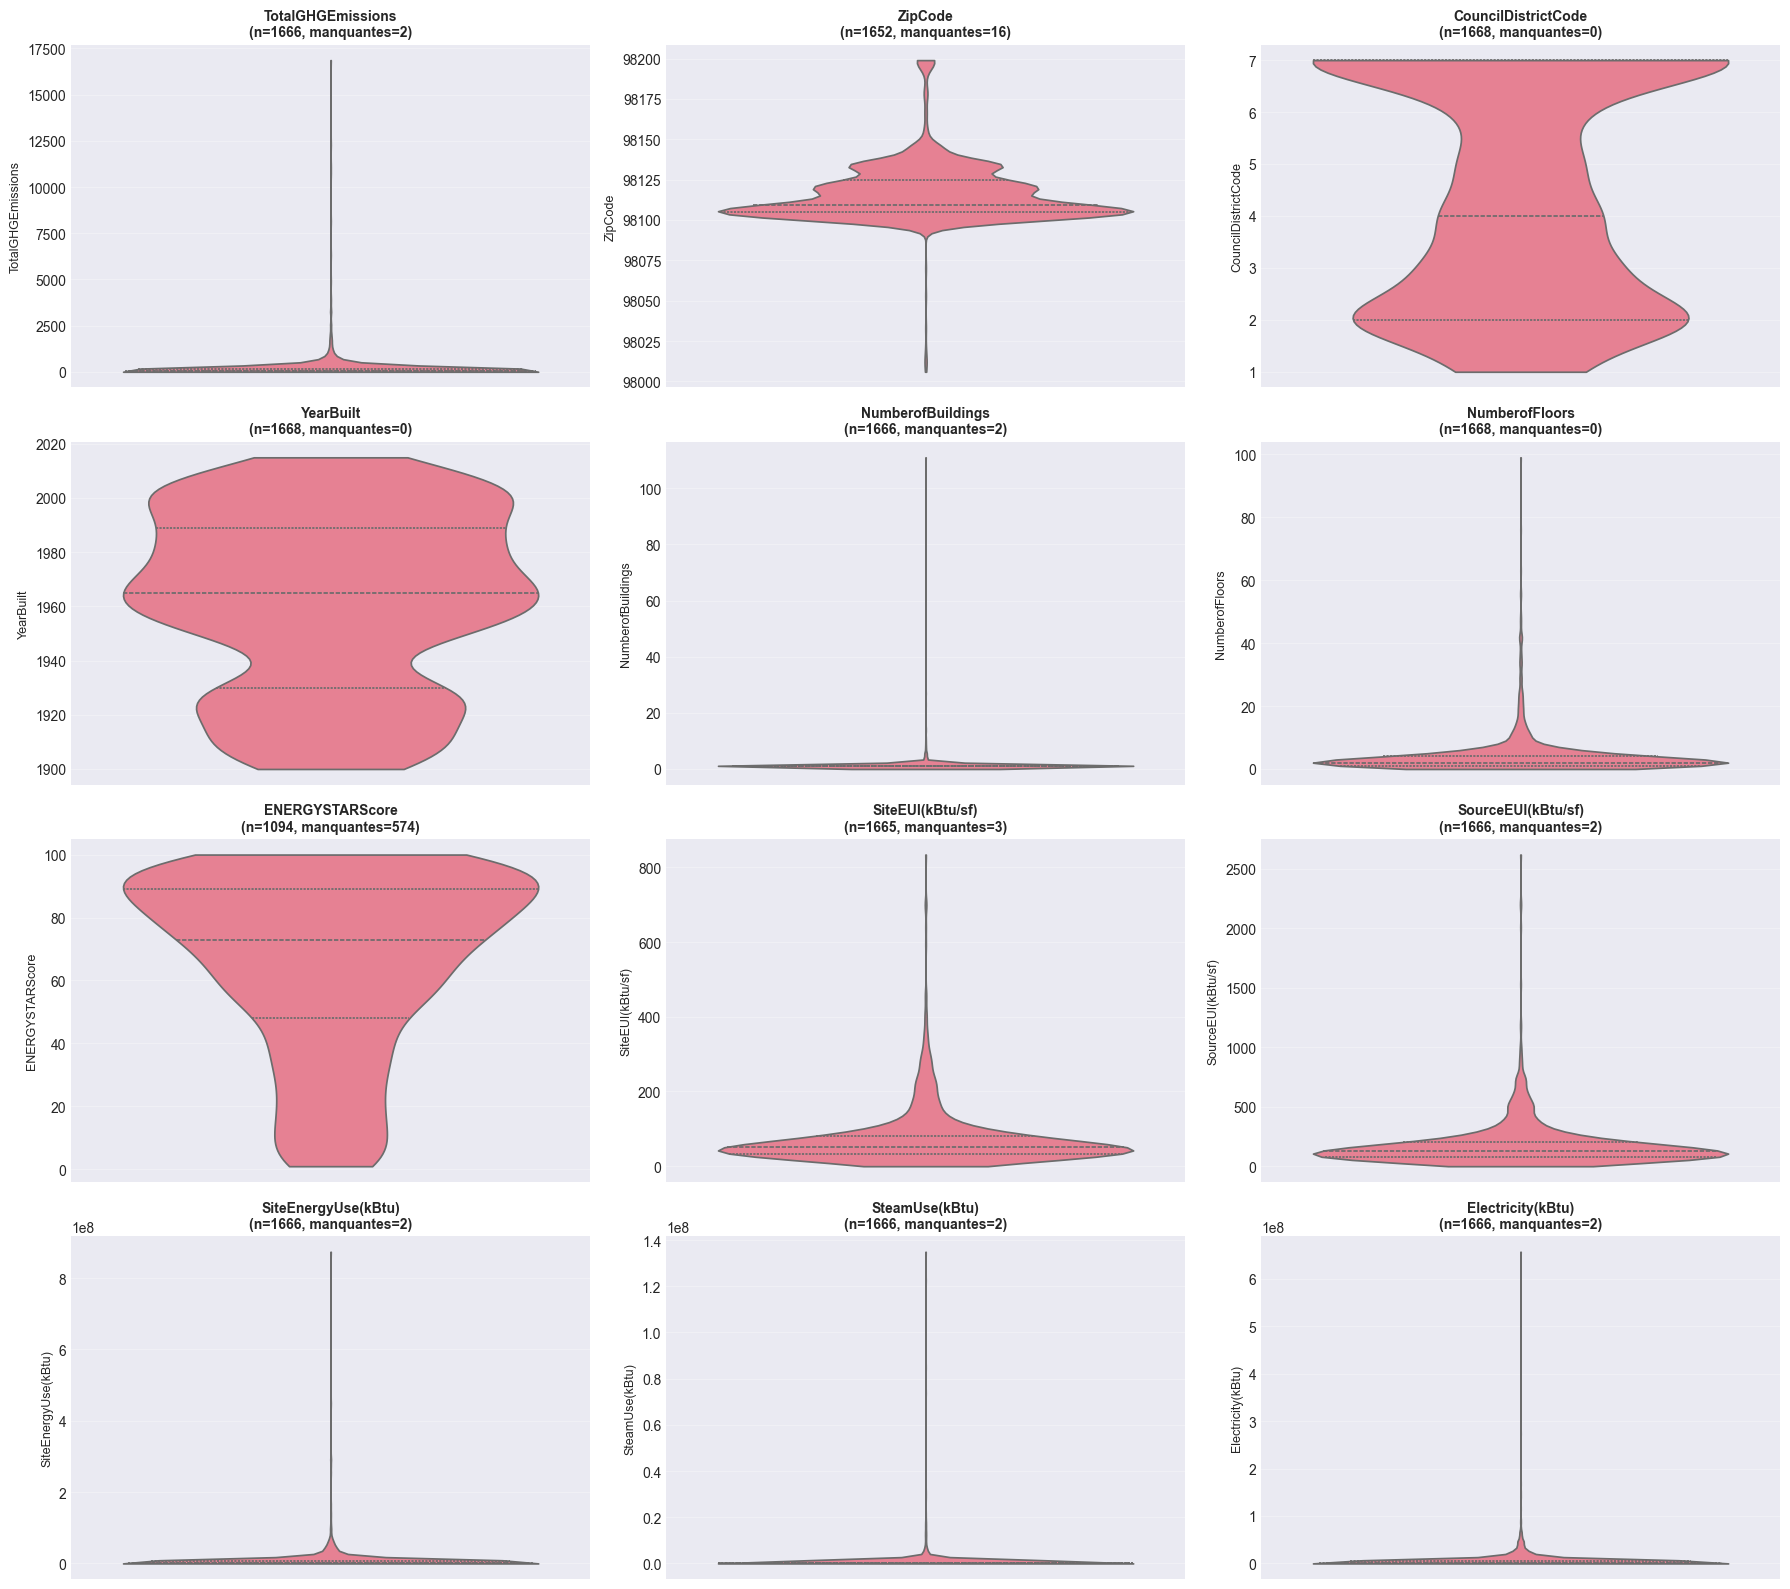


✓ Violin plots des variables quantitatives principales générés


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation des distributions (violin plots)
important_vars = advanced_stats[advanced_stats['% Manquantes'] < 50]['Variable'].head(12).tolist()

if variable_cible not in important_vars and variable_cible in numeric_cols:
    important_vars = [variable_cible] + [v for v in important_vars if v != variable_cible][:11]

n_vars = len(important_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, var in enumerate(important_vars):
    data_to_plot = df[var].dropna()

    sns.violinplot(
        y=data_to_plot,
        ax=axes[idx],
        inner='quartile',   # affiche médiane + quartiles
        cut=0               # évite d'étendre au-delà des données
    )

    axes[idx].set_ylabel(var, fontsize=9)
    axes[idx].set_title(
        f'{var}\n(n={len(data_to_plot)}, manquantes={df[var].isnull().sum()})',
        fontweight='bold',
        fontsize=10
    )
    axes[idx].grid(True, alpha=0.3, axis='y')

# Masquer les axes inutilisés
for idx in range(n_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("\n✓ Violin plots des variables quantitatives principales générés")


Les distributions des variables quantitatives révèlent une forte asymétrie à droite, particulièrement pour les variables énergétiques et d’émissions, traduisant la présence d’outliers structurels.
Les variables quantitatives présentent majoritairement des distributions asymétriques à droite, avec une forte concentration d’observations à de faibles niveaux et la présence de valeurs extrêmes. Les indicateurs énergétiques et d’émissions sont dominés par un petit nombre de bâtiments très énergivores. Certaines variables numériques (ex. ZipCode, CouncilDistrictCode) sont discrètes et doivent être traitées comme catégorielles. Ces constats justifient l’utilisation de transformations logarithmiques et d’une gestion adaptée des outliers avant la modélisation.

### 3.2 Matrice de Corrélation

In [49]:
# Calcul de la matrice de corrélation
correlation_matrix = df[numeric_cols].corr()

# Corrélations avec la variable cible
if variable_cible in correlation_matrix.columns:
    target_correlations = correlation_matrix[variable_cible].sort_values(ascending=False)
    
    print("CORRÉLATIONS AVEC LA VARIABLE CIBLE (ÉMISSIONS DE CO2)")
    print("="*80)
    print(target_correlations.to_string())
    
    # Top corrélations positives et négatives
    print("\n" + "="*80)
    print("TOP 10 CORRÉLATIONS POSITIVES")
    print("="*80)
    print(target_correlations[target_correlations > 0].head(10).to_string())
    
    print("\n" + "="*80)
    print("TOP 10 CORRÉLATIONS NÉGATIVES")
    print("="*80)
    print(target_correlations[target_correlations < 0].tail(10).to_string())

CORRÉLATIONS AVEC LA VARIABLE CIBLE (ÉMISSIONS DE CO2)
TotalGHGEmissions        1.000000
SiteEnergyUse(kBtu)      0.859940
NaturalGas(kBtu)         0.725999
Electricity(kBtu)        0.686572
SteamUse(kBtu)           0.684001
GHGEmissionsIntensity    0.467224
NumberofBuildings        0.418477
SiteEUI(kBtu/sf)         0.257353
SourceEUI(kBtu/sf)       0.203679
NumberofFloors           0.129985
YearBuilt                0.049812
CouncilDistrictCode      0.012391
ZipCode                 -0.053274
ENERGYSTARScore         -0.108145

TOP 10 CORRÉLATIONS POSITIVES
TotalGHGEmissions        1.000000
SiteEnergyUse(kBtu)      0.859940
NaturalGas(kBtu)         0.725999
Electricity(kBtu)        0.686572
SteamUse(kBtu)           0.684001
GHGEmissionsIntensity    0.467224
NumberofBuildings        0.418477
SiteEUI(kBtu/sf)         0.257353
SourceEUI(kBtu/sf)       0.203679
NumberofFloors           0.129985

TOP 10 CORRÉLATIONS NÉGATIVES
ZipCode           -0.053274
ENERGYSTARScore   -0.108145


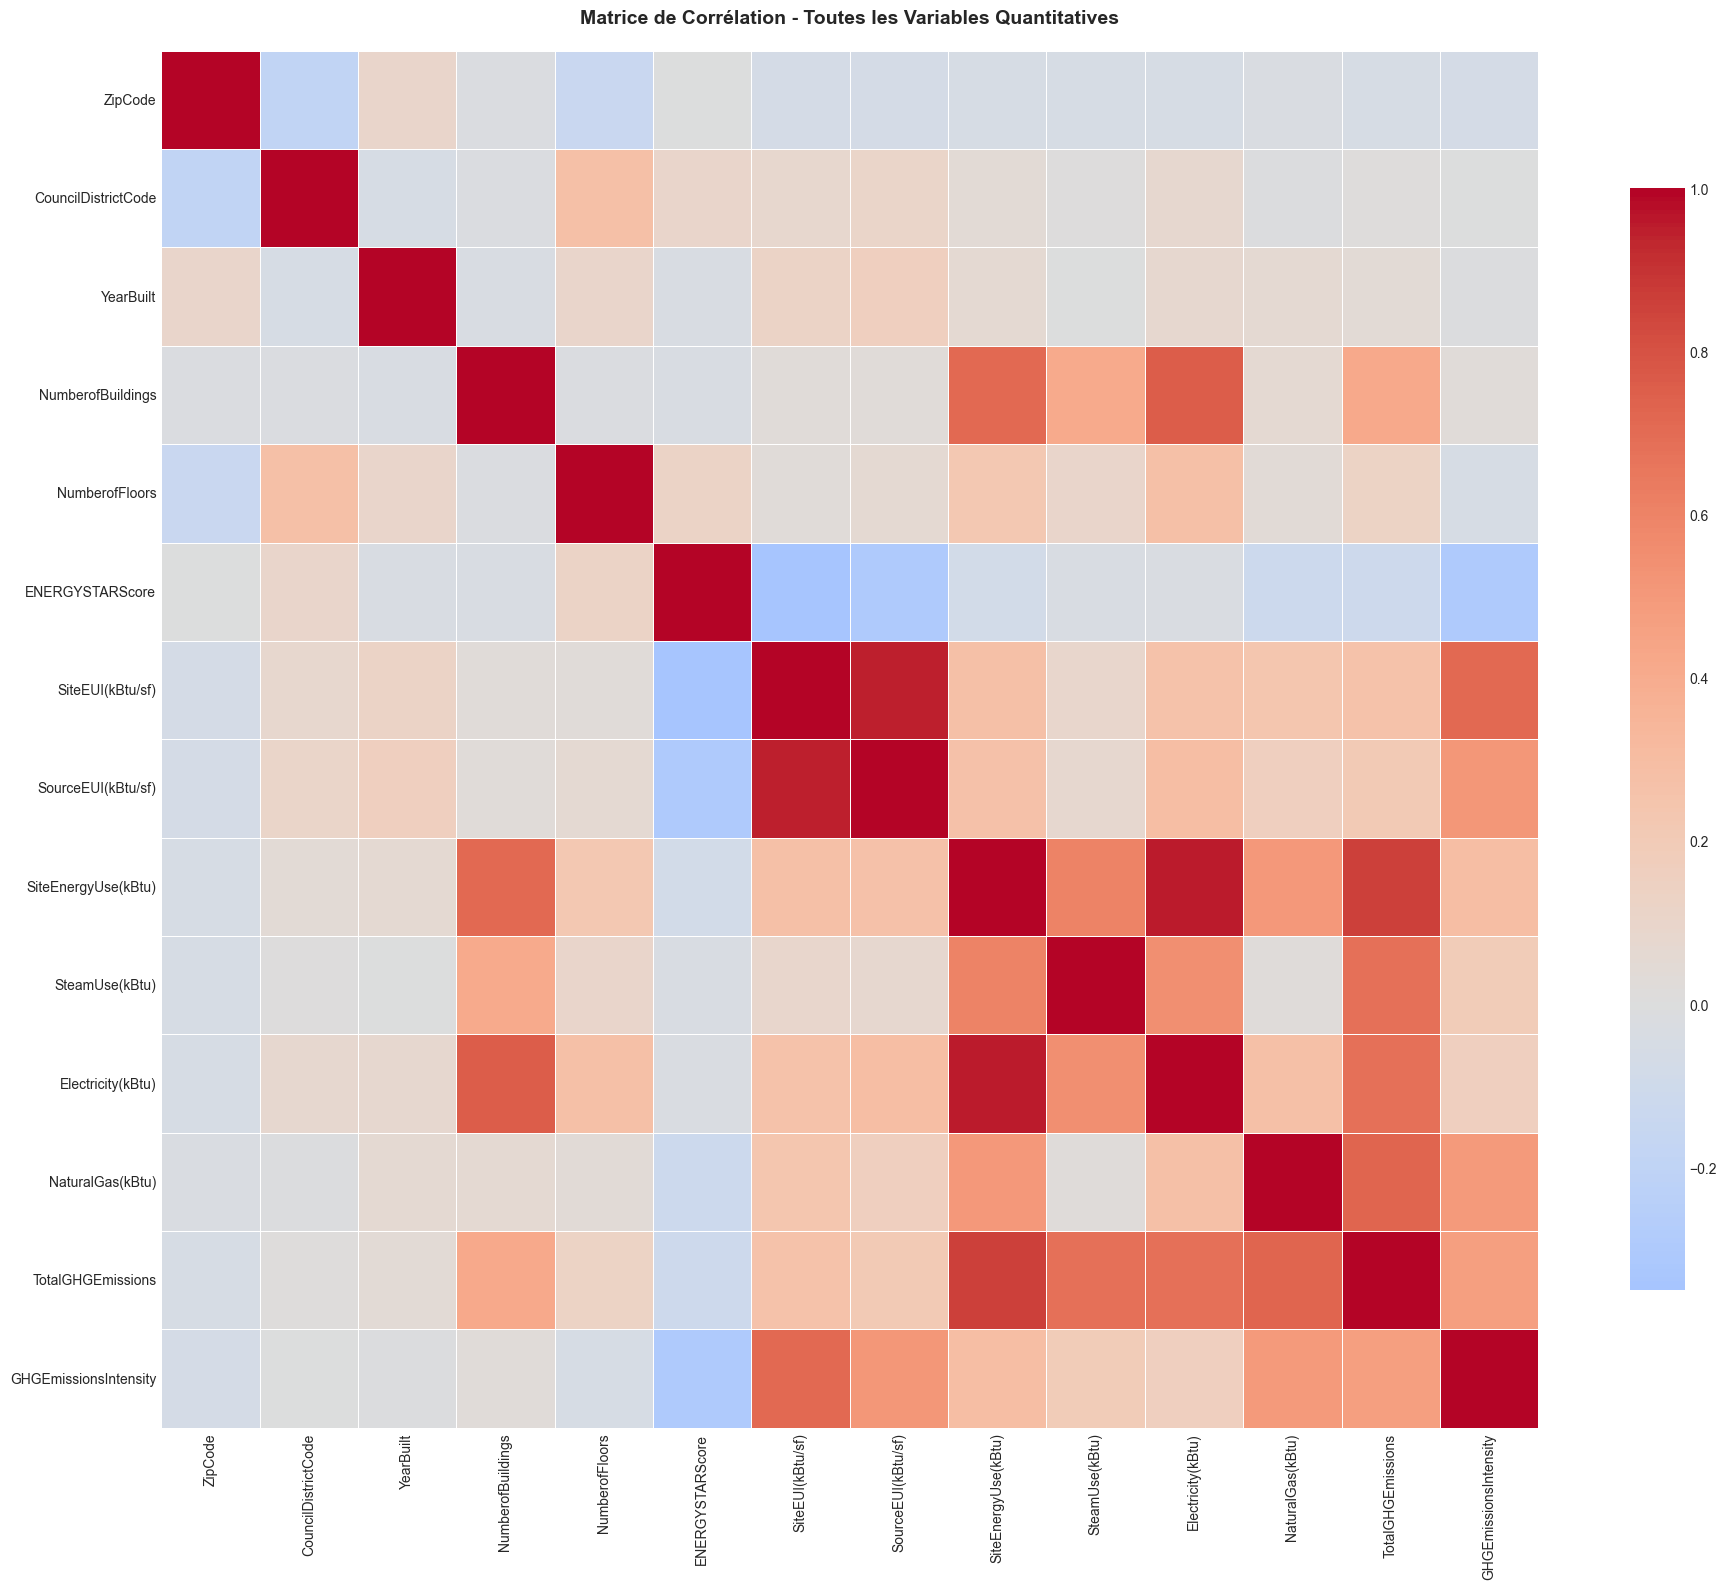


✓ Matrice de corrélation complète générée


In [50]:
# Visualisation de la matrice de corrélation complète
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation - Toutes les Variables Quantitatives', 
          fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Matrice de corrélation complète générée")

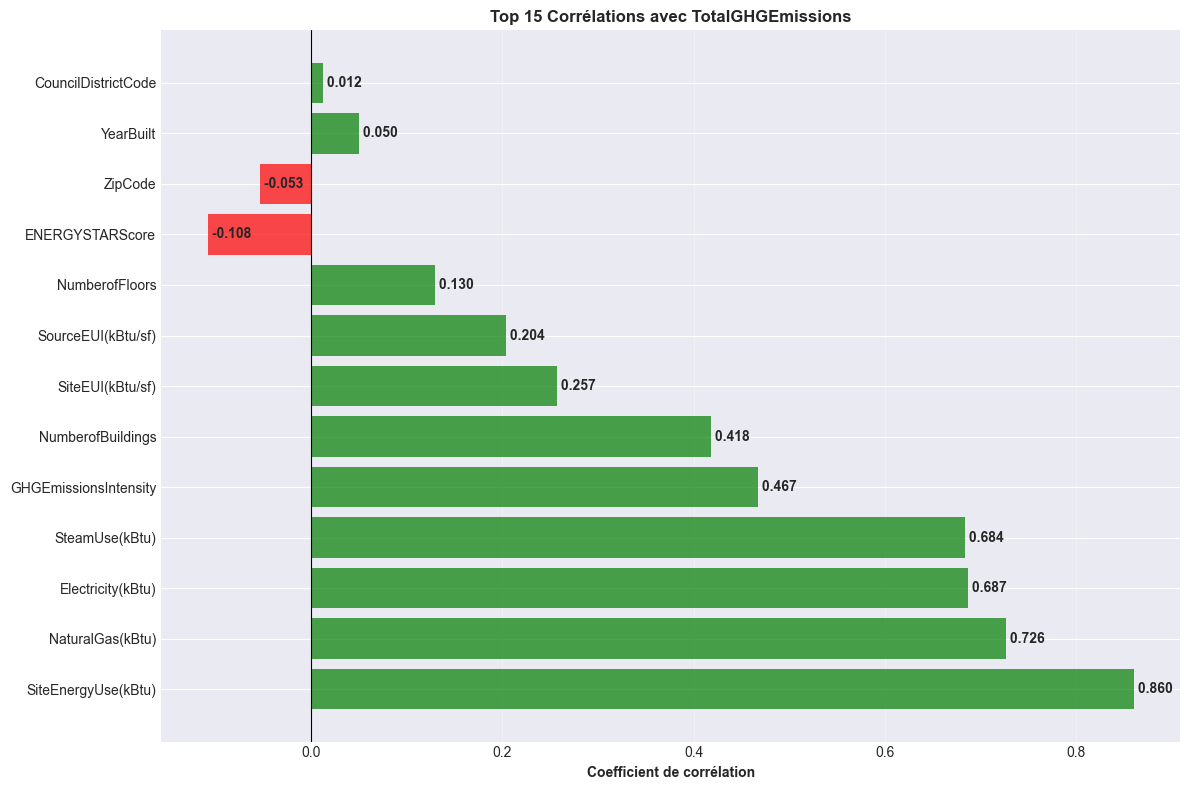


✓ Top 15 corrélations visualisées


In [51]:
# Visualisation des corrélations avec la variable cible
if variable_cible in correlation_matrix.columns:
    top_n = 15
    top_correlations = target_correlations.drop(variable_cible).abs().sort_values(ascending=False).head(top_n)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = ['green' if target_correlations[var] > 0 else 'red' for var in top_correlations.index]
    
    ax.barh(range(len(top_correlations)), 
            [target_correlations[var] for var in top_correlations.index],
            color=colors, alpha=0.7)
    ax.set_yticks(range(len(top_correlations)))
    ax.set_yticklabels(top_correlations.index)
    ax.set_xlabel('Coefficient de corrélation', fontweight='bold')
    ax.set_title(f'Top {top_n} Corrélations avec {variable_cible}', fontweight='bold', fontsize=12)
    ax.axvline(0, color='black', linewidth=0.8)
    ax.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, var in enumerate(top_correlations.index):
        value = target_correlations[var]
        ax.text(value, i, f' {value:.3f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Top {top_n} corrélations visualisées")

### 3.3 Visualisations Bivariées (Variable Cible vs Prédicteurs)

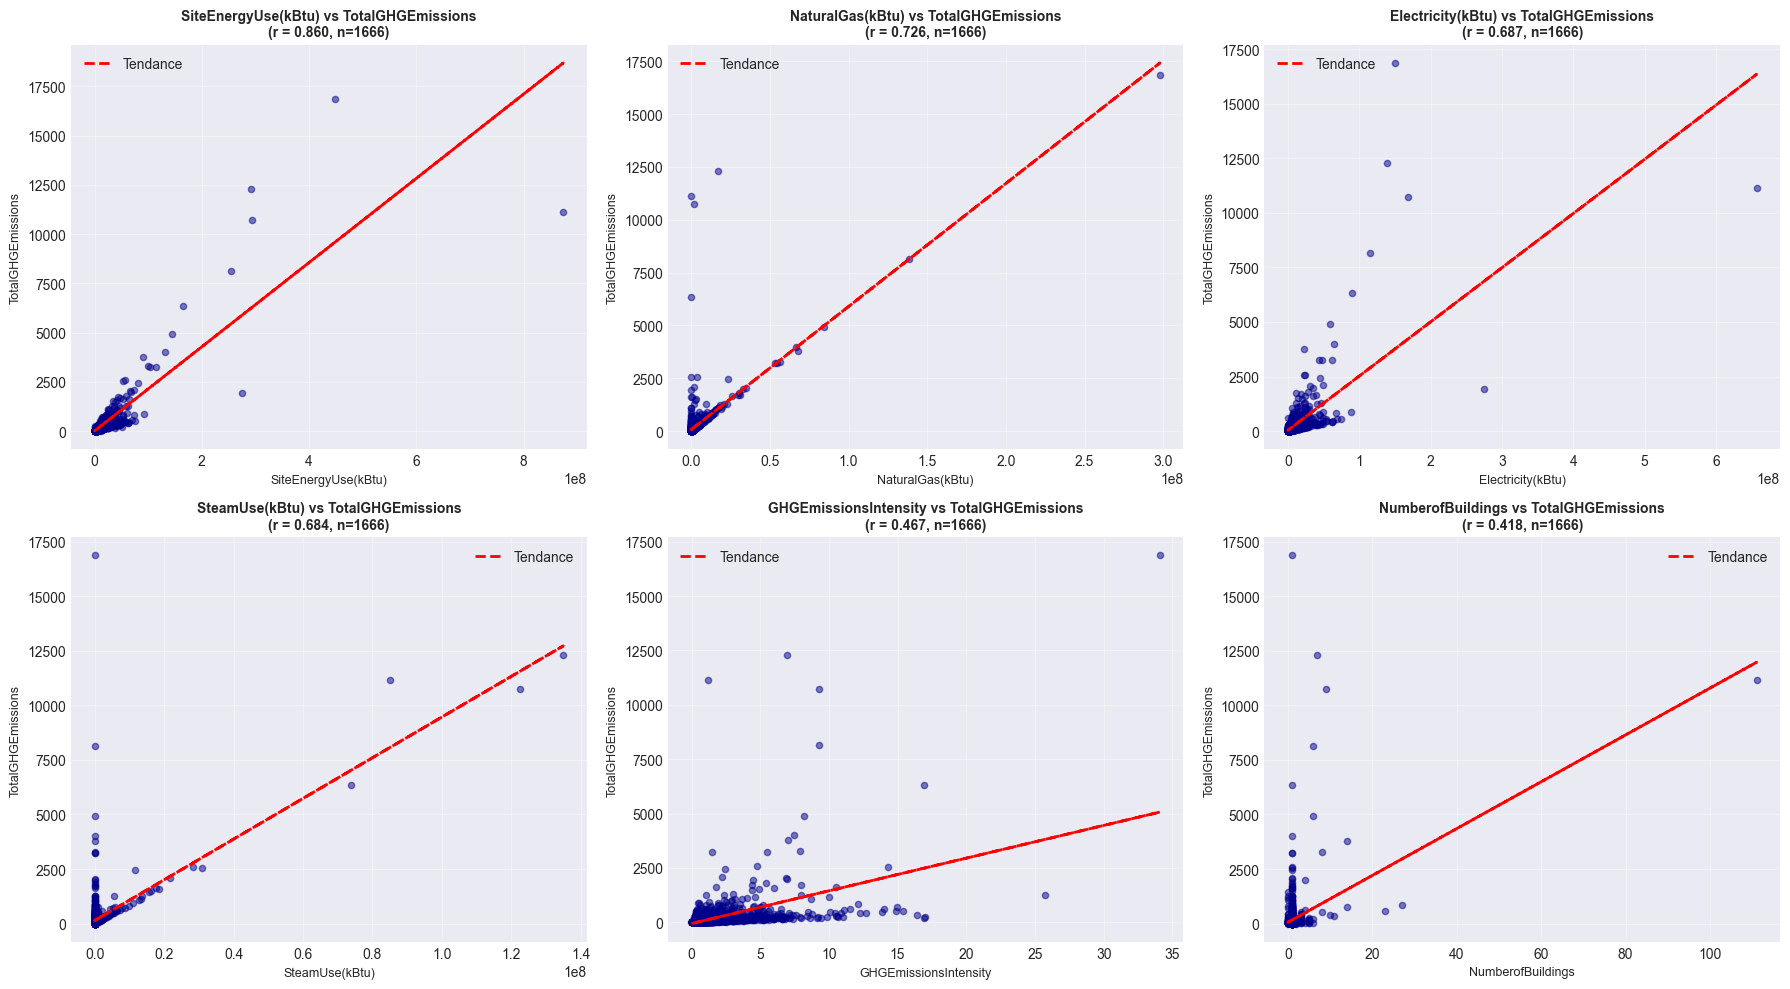


✓ Scatter plots bivariés générés


In [52]:
# Scatter plots des variables les plus corrélées avec la cible
if variable_cible in correlation_matrix.columns:
    top_vars = target_correlations.drop(variable_cible).abs().sort_values(ascending=False).head(6).index.tolist()
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, var in enumerate(top_vars):
        data_clean = df[[var, variable_cible]].dropna()
        
        axes[idx].scatter(data_clean[var], data_clean[variable_cible], 
                         alpha=0.5, s=20, color='darkblue')
        
        # Ligne de tendance
        z = np.polyfit(data_clean[var], data_clean[variable_cible], 1)
        p = np.poly1d(z)
        axes[idx].plot(data_clean[var], p(data_clean[var]), 
                      "r--", linewidth=2, label=f'Tendance')
        
        corr_val = target_correlations[var]
        axes[idx].set_xlabel(var, fontsize=9)
        axes[idx].set_ylabel(variable_cible, fontsize=9)
        axes[idx].set_title(f'{var} vs {variable_cible}\n(r = {corr_val:.3f}, n={len(data_clean)})', 
                           fontweight='bold', fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Scatter plots bivariés générés")

<a id='4'></a>
## 4. Analyse des Variables Qualitatives

### 4.1 Distribution des Catégories

In [77]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['City', 'State', 'Address', 'PropertyName', 'TaxParcelIdentificationNumber', 'Comments', 'OSEBuildingID', 'Outlier']]

print(f"VARIABLES CATÉGORIQUES IDENTIFIÉES: {(categorical_cols)}")
print(len(categorical_cols))


VARIABLES CATÉGORIQUES IDENTIFIÉES: ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified', 'ComplianceStatus']
9


In [78]:
len(df['SecondLargestPropertyUseType'].unique())


48

In [79]:
# Sélection des variables catégorielles

print(f"VARIABLES QUALITATIVES IDENTIFIÉES: {len(categorical_cols)}")
print("="*80)
for i, col in enumerate(categorical_cols, 1):
    n_unique = df[col].nunique()
    n_missing = df[col].isnull().sum()
    pct_missing = (n_missing / len(df) * 100)
    print(f"{i:2d}. {col:40s} - {n_unique:4d} modalités | {n_missing:5d} manquantes ({pct_missing:5.2f}%)")

VARIABLES QUALITATIVES IDENTIFIÉES: 9
 1. BuildingType                             -    4 modalités |     0 manquantes ( 0.00%)
 2. PrimaryPropertyType                      -   22 modalités |     0 manquantes ( 0.00%)
 3. Neighborhood                             -   19 modalités |     0 manquantes ( 0.00%)
 4. ListOfAllPropertyUseTypes                -  373 modalités |     2 manquantes ( 0.12%)
 5. LargestPropertyUseType                   -   56 modalités |     6 manquantes ( 0.36%)
 6. SecondLargestPropertyUseType             -   47 modalités |   813 manquantes (48.74%)
 7. ThirdLargestPropertyUseType              -   39 modalités |  1315 manquantes (78.84%)
 8. YearsENERGYSTARCertified                 -   64 modalités |  1570 manquantes (94.12%)
 9. ComplianceStatus                         -    4 modalités |     0 manquantes ( 0.00%)



VARIABLE: BuildingType

Nombre de modalités: 4
Valeurs manquantes: 0 (0.00%)

Distribution des modalités (Top 10):
BuildingType
NonResidential        1461
SPS-District K-12       98
Nonresidential COS      85
Campus                  24


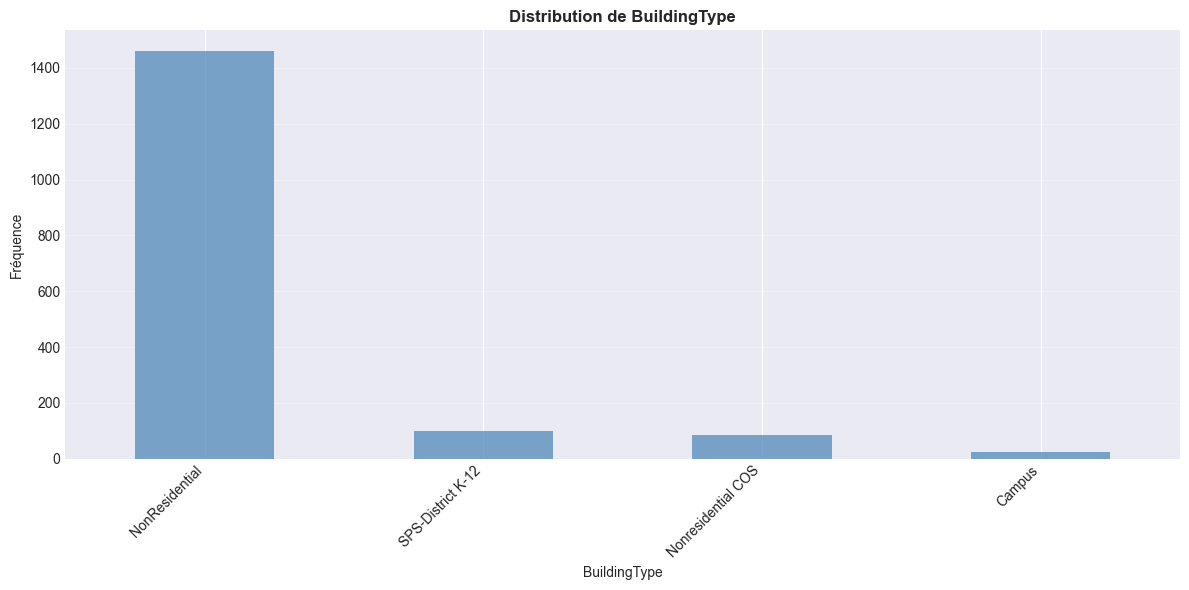


VARIABLE: PrimaryPropertyType

Nombre de modalités: 22
Valeurs manquantes: 0 (0.00%)

Distribution des modalités (Top 10):
PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53


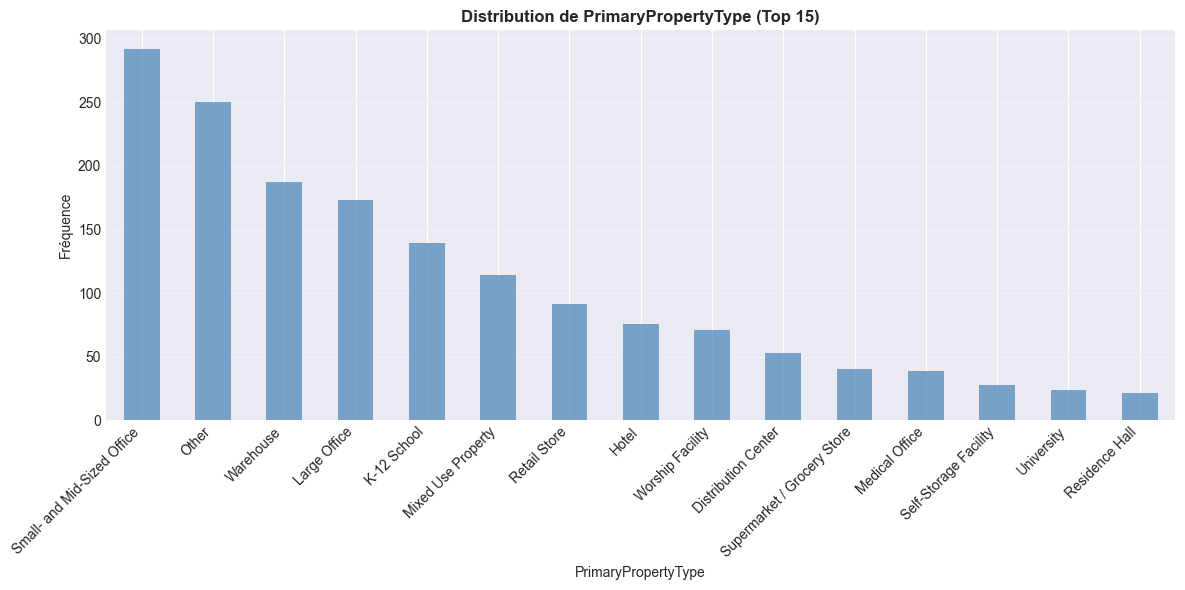


VARIABLE: Neighborhood

Nombre de modalités: 19
Valeurs manquantes: 0 (0.00%)

Distribution des modalités (Top 10):
Neighborhood
DOWNTOWN                 361
GREATER DUWAMISH         346
MAGNOLIA / QUEEN ANNE    151
LAKE UNION               148
NORTHEAST                128
EAST                     121
NORTHWEST                 81
BALLARD                   64
NORTH                     58
CENTRAL                   51


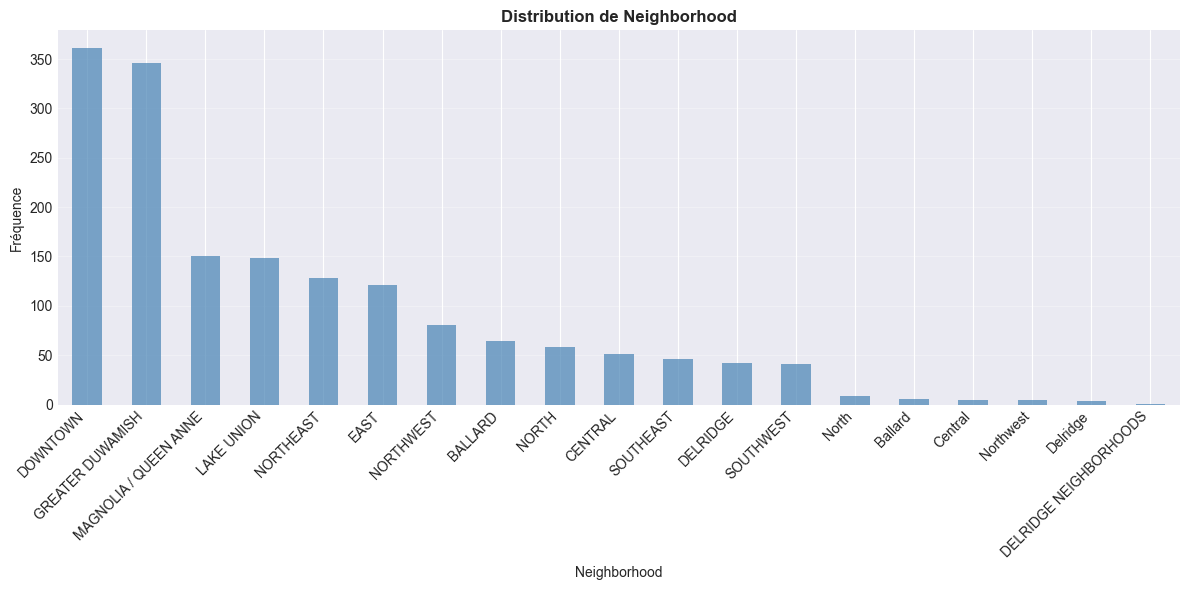


VARIABLE: ListOfAllPropertyUseTypes

Nombre de modalités: 373
Valeurs manquantes: 2 (0.12%)

Distribution des modalités (Top 10):
ListOfAllPropertyUseTypes
Office                                138
K-12 School                           135
Office, Parking                       120
Non-Refrigerated Warehouse            101
Non-Refrigerated Warehouse, Office     61
Other                                  60
Retail Store                           56
Worship Facility                       48
Hotel                                  44
Office, Retail Store                   43


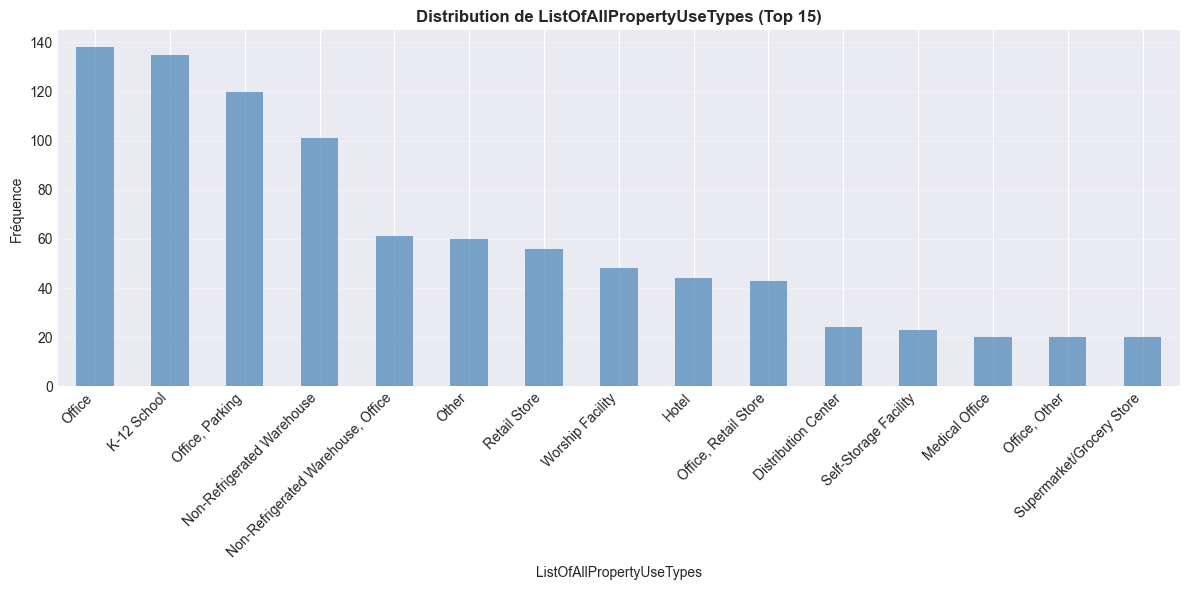


VARIABLE: LargestPropertyUseType

Nombre de modalités: 56
Valeurs manquantes: 6 (0.36%)

Distribution des modalités (Top 10):
LargestPropertyUseType
Office                        497
Non-Refrigerated Warehouse    199
K-12 School                   139
Retail Store                   99
Other                          98
Hotel                          76
Worship Facility               71
Distribution Center            54
Medical Office                 41
Supermarket/Grocery Store      41


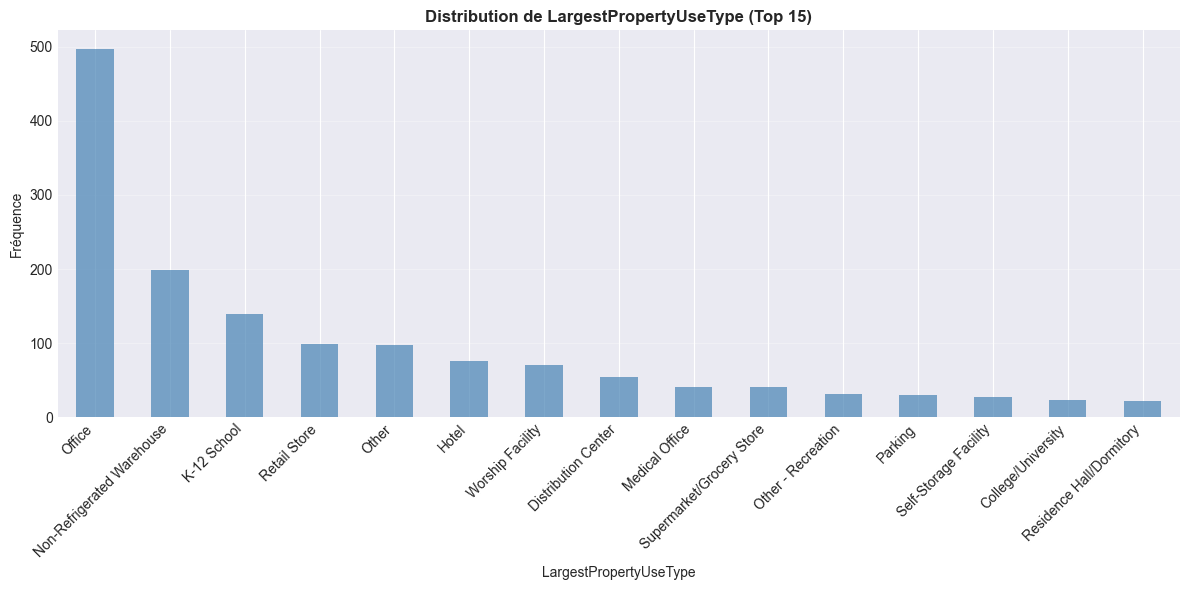


✓ Analyse des variables qualitatives complétée


In [80]:
# Analyse détaillée des variables catégorielles
for col in categorical_cols[:5]:  # Analyser les 5 premières
    print("\n" + "="*80)
    print(f"VARIABLE: {col}")
    print("="*80)
    
    value_counts = df[col].value_counts()
    print(f"\nNombre de modalités: {len(value_counts)}")
    print(f"Valeurs manquantes: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    print(f"\nDistribution des modalités (Top 10):")
    print(value_counts.head(10).to_string())
    
    # Visualisation
    if len(value_counts) <= 20:
        plt.figure(figsize=(12, 6))
        value_counts.plot(kind='bar', color='steelblue', alpha=0.7)
        plt.title(f'Distribution de {col}', fontweight='bold', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(12, 6))
        value_counts.head(15).plot(kind='bar', color='steelblue', alpha=0.7)
        plt.title(f'Distribution de {col} (Top 15)', fontweight='bold', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

print("\n✓ Analyse des variables qualitatives complétée")

### 4.2 Relation avec les Émissions de CO2

ANALYSE DE LA RELATION VARIABLES QUALITATIVES - ÉMISSIONS DE CO2

Variable: BuildingType
--------------------------------------------------------------------------------
                    count     mean  median      std
BuildingType                                       
Campus                 24  1859.23  339.51  4006.85
NonResidential       1459   166.24   47.03   585.92
Nonresidential COS     85   139.08   81.24   157.21
SPS-District K-12      98    93.62   58.51    93.68


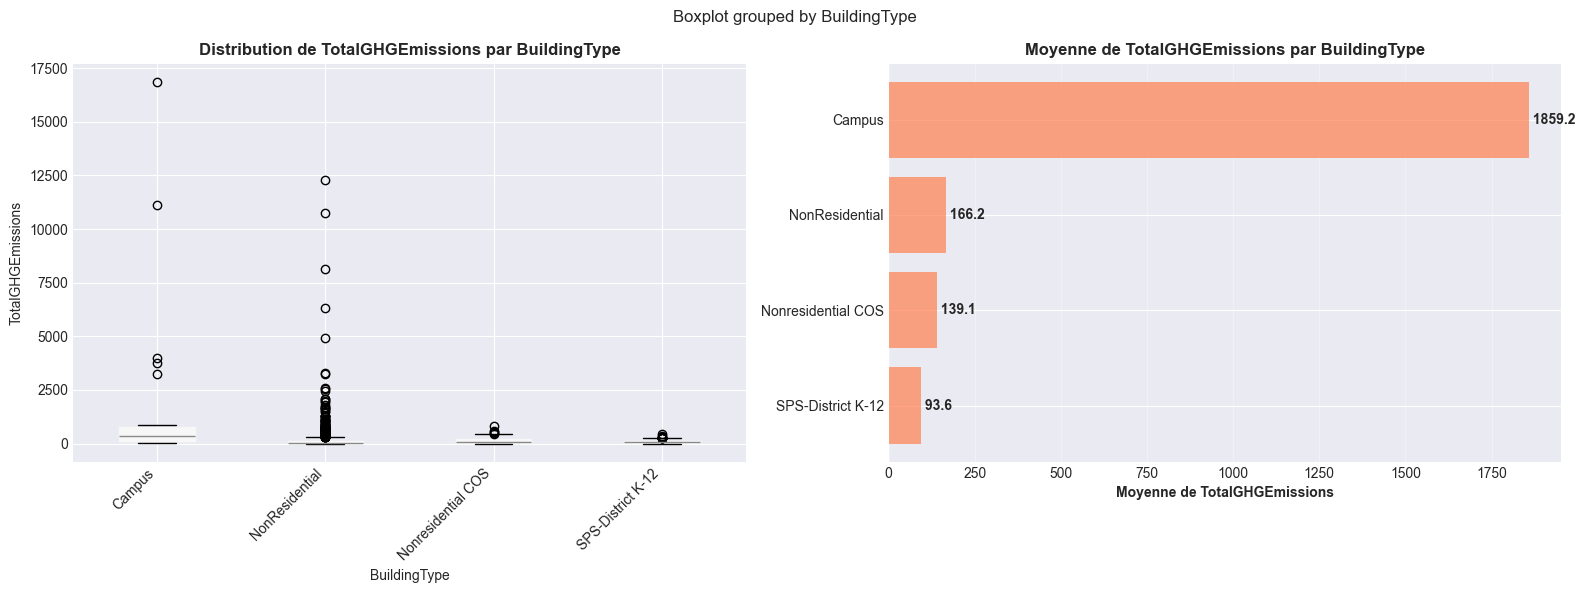


Variable: Neighborhood
--------------------------------------------------------------------------------
                        count    mean  median      std
Neighborhood                                          
EAST                      121  476.57   78.36  1629.41
NORTHEAST                 127  267.06   53.88  1222.35
DOWNTOWN                  360  211.89   87.38   358.71
LAKE UNION                148  194.82   61.90   406.81
CENTRAL                    51  165.84   41.96   682.22
NORTHWEST                  81  154.53   49.58   378.93
SOUTHWEST                  41  139.24   48.99   275.74
MAGNOLIA / QUEEN ANNE     151  130.53   43.98   334.36
GREATER DUWAMISH          346  119.18   33.24   911.66
BALLARD                    64  117.85   38.69   262.23
Central                     5  106.26   53.02   125.05
SOUTHEAST                  46  106.12   45.32   156.68
DELRIDGE                   42  105.18   55.06   151.60
North                       9   88.13   62.94    97.36
NORTH          

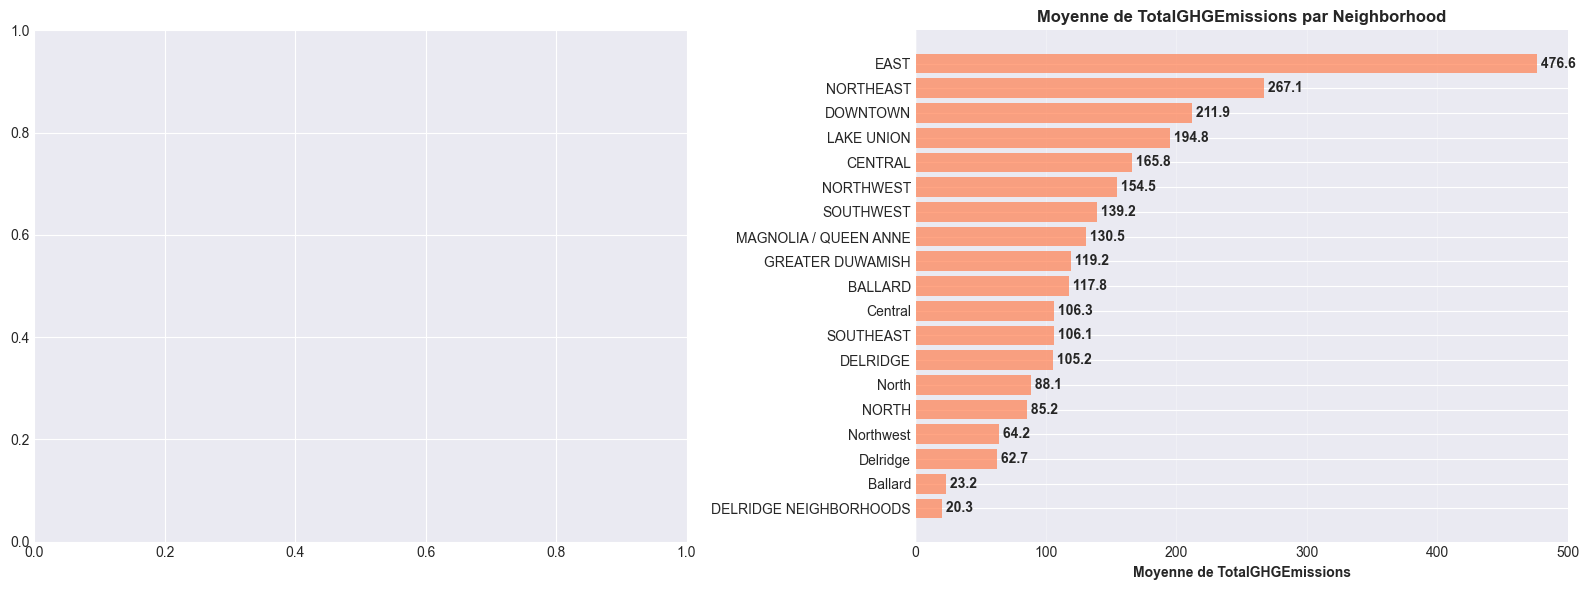


Variable: ComplianceStatus
--------------------------------------------------------------------------------
                              count    mean  median     std
ComplianceStatus                                           
Compliant                      1548  193.61   49.84  779.11
Error - Correct Default Data     88   80.14   55.06   79.84
Missing Data                     14   56.92   12.74   92.14
Non-Compliant                    16   38.12    1.67   98.35


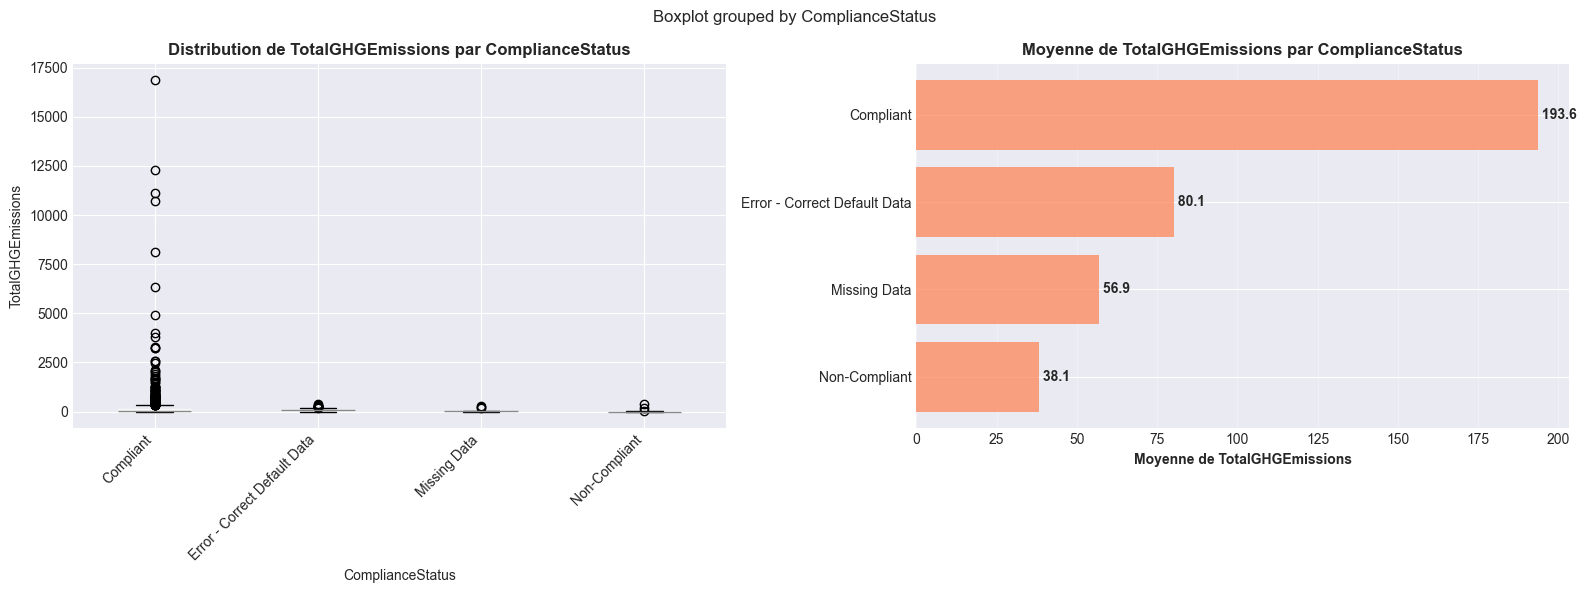


✓ Analyse de la relation variables qualitatives - CO2 complétée


In [82]:
# Analyser la relation entre variables catégorielles et la variable cible
# Sélectionner les variables catégorielles avec un nombre raisonnable de modalités
cat_vars_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 20 and df[col].nunique() > 1]

print("ANALYSE DE LA RELATION VARIABLES QUALITATIVES - ÉMISSIONS DE CO2")
print("="*80)

for col in cat_vars_to_analyze[:5]:  # Analyser les 5 premières
    print(f"\nVariable: {col}")
    print("-" * 80)
    
    # Statistiques par catégorie
    stats_by_cat = df.groupby(col)[variable_cible].agg(['count', 'mean', 'median', 'std']).round(2)
    stats_by_cat = stats_by_cat.sort_values('mean', ascending=False)
    print(stats_by_cat.to_string())
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Boxplot
    data_for_plot = df[[col, variable_cible]].dropna()
    if len(data_for_plot[col].unique()) <= 15:
        data_for_plot.boxplot(column=variable_cible, by=col, ax=axes[0], 
                             patch_artist=True, rot=45)
        axes[0].set_title(f'Distribution de {variable_cible} par {col}', fontweight='bold')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel(variable_cible)
        plt.sca(axes[0])
        plt.xticks(rotation=45, ha='right')
    
    # Barplot des moyennes
    means = stats_by_cat['mean'].sort_values(ascending=True)
    axes[1].barh(range(len(means)), means.values, color='coral', alpha=0.7)
    axes[1].set_yticks(range(len(means)))
    axes[1].set_yticklabels(means.index)
    axes[1].set_xlabel(f'Moyenne de {variable_cible}', fontweight='bold')
    axes[1].set_title(f'Moyenne de {variable_cible} par {col}', fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs
    for i, v in enumerate(means.values):
        axes[1].text(v, i, f' {v:.1f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("\n✓ Analyse de la relation variables qualitatives - CO2 complétée")

In [83]:
# Test ANOVA pour vérifier la significativité des différences entre groupes
from scipy.stats import f_oneway

print("\nTESTS ANOVA - SIGNIFICATIVITÉ DES DIFFÉRENCES ENTRE GROUPES")
print("="*80)
print("H0: Les moyennes de CO2 sont égales pour tous les groupes")
print("Seuil: α = 0.05\n")

anova_results = []

for col in cat_vars_to_analyze[:5]:
    # Préparer les groupes
    groups = [group[variable_cible].dropna() for name, group in df.groupby(col) 
              if len(group[variable_cible].dropna()) > 0]
    
    if len(groups) >= 2:
        # Test ANOVA
        f_stat, p_value = f_oneway(*groups)
        
        anova_results.append({
            'Variable': col,
            'F-statistic': f"{f_stat:.4f}",
            'P-value': f"{p_value:.6e}",
            'Significatif': 'Oui ✓' if p_value < 0.05 else 'Non'
        })

anova_df = pd.DataFrame(anova_results)
print(anova_df.to_string(index=False))

print("\n" + "="*80)
print("✓ Tests statistiques complétés")


TESTS ANOVA - SIGNIFICATIVITÉ DES DIFFÉRENCES ENTRE GROUPES
H0: Les moyennes de CO2 sont égales pour tous les groupes
Seuil: α = 0.05

        Variable F-statistic      P-value Significatif
    BuildingType     43.6642 3.700287e-27        Oui ✓
    Neighborhood      1.5212 7.376083e-02          Non
ComplianceStatus      0.9769 4.027182e-01          Non

✓ Tests statistiques complétés


<a id='5'></a>
## 5. Conclusions et Recommandations

### Synthèse de l'Analyse Exploratoire

#### 1. **Variable Cible : Émissions de CO2**
- **Distribution** : [À compléter après exécution]
- **Valeurs manquantes** : [À compléter]
- **Valeurs aberrantes** : [À compléter]
- **Normalité** : [À compléter]

#### 2. **Variables Quantitatives**
- **Corrélations fortes** : [À compléter]
- **Variables prometteuses** : [À compléter]

#### 3. **Variables Qualitatives**
- **Variables significatives** : [À compléter]
- **Catégories influentes** : [À compléter]

#### 4. **Recommandations pour la Modélisation**

**Si la variable cible n'est pas normale :**
- Appliquer une transformation (log, Box-Cox, etc.)
- Ou utiliser des modèles robustes (arbres, forêts aléatoires, gradient boosting)

**Traitement des valeurs manquantes :**
- Imputation pour les variables importantes
- Suppression si > 50% de données manquantes

**Traitement des outliers :**
- Analyse de sensibilité
- Winsorisation ou transformation

**Sélection de variables :**
- Prioriser les variables avec corrélation |r| > 0.3
- Vérifier la multicolinéarité (VIF)
- Encoder les variables catégorielles significatives

#### 5. **Prochaines Étapes**
1. Prétraitement des données
2. Feature engineering
3. Sélection des variables
4. Construction et validation du modèle
5. Interprétation des résultats